In [562]:
#Import all necessary modules
import pandas as pd  ###Software library written for the Python programming language for data manipulation and analysis.
import numpy as np ### fundamental package for scientific computing with Python
import seaborn as sns
import os ### using operating system dependent functionality
import scipy.stats as stats
import matplotlib.pyplot as plt 
import matplotlib.style
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.linear_model import LinearRegression
# For randomized data splitting
from sklearn.model_selection import train_test_split
# To build linear regression_model
import statsmodels.api as sm

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.metrics import mean_absolute_error, mean_squared_error,accuracy_score, roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier

In [563]:
df = pd.read_excel("C:/Users/prapthi.pandian/Documents/GL-Python Data/Mod 5/Proj/compactiv.xlsx")  

In [564]:
df.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  

[5 rows x 22 columns]

In [565]:
df.shape

(8192, 22)

In [566]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [567]:
df.describe()

lread       lwrite         scall        sread       swrite  \
count  8192.000000  8192.000000   8192.000000  8192.000000  8192.000000   
mean     19.559692    13.106201   2306.318237   210.479980   150.058228   
std      53.353799    29.891726   1633.617322   198.980146   160.478980   
min       0.000000     0.000000    109.000000     6.000000     7.000000   
25%       2.000000     0.000000   1012.000000    86.000000    63.000000   
50%       7.000000     1.000000   2051.500000   166.000000   117.000000   
75%      20.000000    10.000000   3317.250000   279.000000   185.000000   
max    1845.000000   575.000000  12493.000000  5318.000000  5456.000000   

              fork         exec         rchar         wchar        pgout  ...  \
count  8192.000000  8192.000000  8.088000e+03  8.177000e+03  8192.000000  ...   
mean      1.884554     2.791998  1.973857e+05  9.590299e+04     2.285317  ...   
std       2.479493     5.212456  2.398375e+05  1.408417e+05     5.307038  ...   
min       0.000000     0.000000  2.780000e+02  1.498000e+03     0.000000  ...   
25%       0.400000     0.200000  3.409150e+04  2.291600e+04     0.000000  ...   
50%       0.800000     1.200000  1.254735e+05  4.661900e+04     0.000000  ...   
75%       2.200000     2.800000  2.678288e+05  1.061010e+05     2.400000  ...   
max      20.120000    59.560000  2.526649e+06  1.801623e+06    81.440000  ...   

            pgfree       pgscan         atch         pgin        ppgin  \
count  8192.000000  8192.000000  8192.000000  8192.000000  8192.000000   
mean     11.919712    21.526849     1.127505     8.277960    12.388586   
std      32.363520    71.141340     5.708347    13.874978    22.281318   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.600000     0.600000   
50%       0.000000     0.000000     0.000000     2.800000     3.800000   
75%       5.000000     0.000000     0.600000     9.765000    13.800000   
max     523.000000  1237.000000   211.580000   141.200000   292.610000   

              pflt         vflt       freemem      freeswap          usr  
count  8192.000000  8192.000000   8192.000000  8.192000e+03  8192.000000  
mean    109.793799   185.315796   1763.456299  1.328126e+06    83.968872  
std     114.419221   191.000603   2482.104511  4.220194e+05    18.401905  
min       0.000000     0.200000     55.000000  2.000000e+00     0.000000  
25%      25.000000    45.400000    231.000000  1.042624e+06    81.000000  
50%      63.800000   120.400000    579.000000  1.289290e+06    89.000000  
75%     159.600000   251.800000   2002.250000  1.730380e+06    94.000000  
max     899.800000  1365.000000  12027.000000  2.243187e+06    99.000000  

[8 rows x 21 columns]

In [568]:
df_num = df.select_dtypes(include = ['int64','float'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

21

In [569]:
df_num.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgfree  pgscan  atch  pgin  ppgin    pflt    vflt  freemem  freeswap  \
0  ...     0.0     0.0   0.0   1.6    2.6   16.00   26.40     4670   1730946   
1  ...     0.0     0.0   0.0   0.0    0.0   15.63   16.83     7278   1869002   
2  ...     0.0     0.0   1.2   6.0    9.4  150.20  220.20      702   1021237   
3  ...     0.0     0.0   0.0   0.2    0.2   15.60   16.80     7248   1863704   
4  ...     0.0     0.0   0.0   1.0    1.2   37.80   47.60      633   1760253   

   usr  
0   95  
1   97  
2   87  
3   98  
4   90  

[5 rows x 21 columns]

In [570]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    print('\n\nSkew :',round(df[column].skew(),2))
    print('\n')
    plt.figure(figsize=(15,4))
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    plt.subplot(1,2,1)
    df[column].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[column])
    plt.show()

Description of lread
----------------------------------------------------------------------------
count    8192.000000
mean       19.559692
std        53.353799
min         0.000000
25%         2.000000
50%         7.000000
75%        20.000000
max      1845.000000
Name: lread, dtype: float64 

Skew : 13.9


Distribution of lread
----------------------------------------------------------------------------


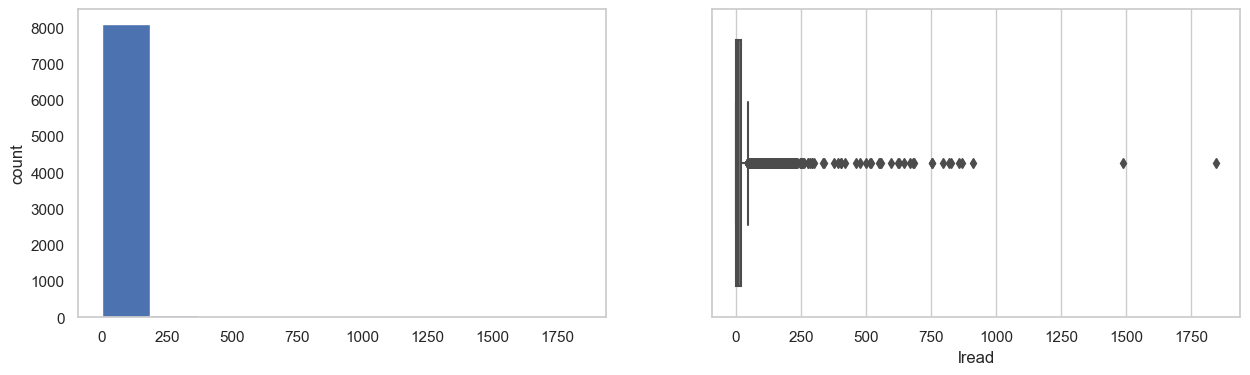

Description of lwrite
----------------------------------------------------------------------------
count    8192.000000
mean       13.106201
std        29.891726
min         0.000000
25%         0.000000
50%         1.000000
75%        10.000000
max       575.000000
Name: lwrite, dtype: float64 

Skew : 5.28


Distribution of lwrite
----------------------------------------------------------------------------


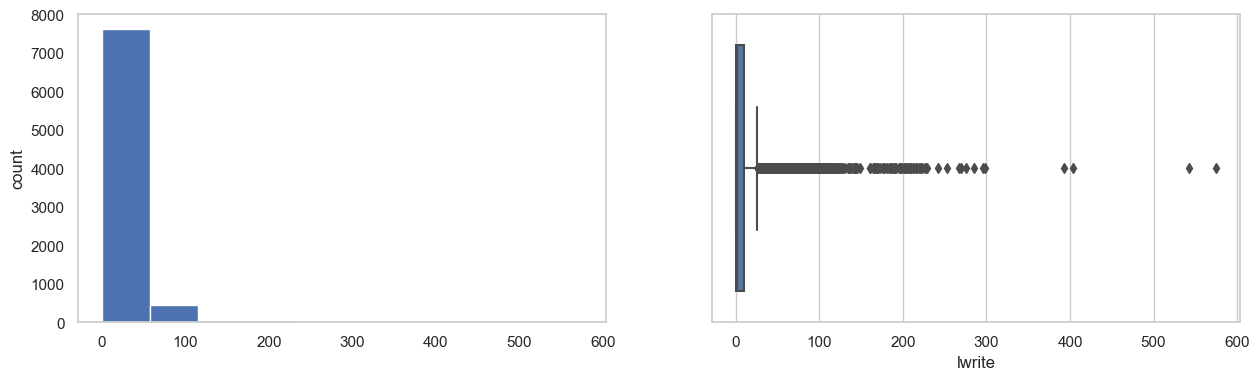

Description of scall
----------------------------------------------------------------------------
count     8192.000000
mean      2306.318237
std       1633.617322
min        109.000000
25%       1012.000000
50%       2051.500000
75%       3317.250000
max      12493.000000
Name: scall, dtype: float64 

Skew : 0.9


Distribution of scall
----------------------------------------------------------------------------


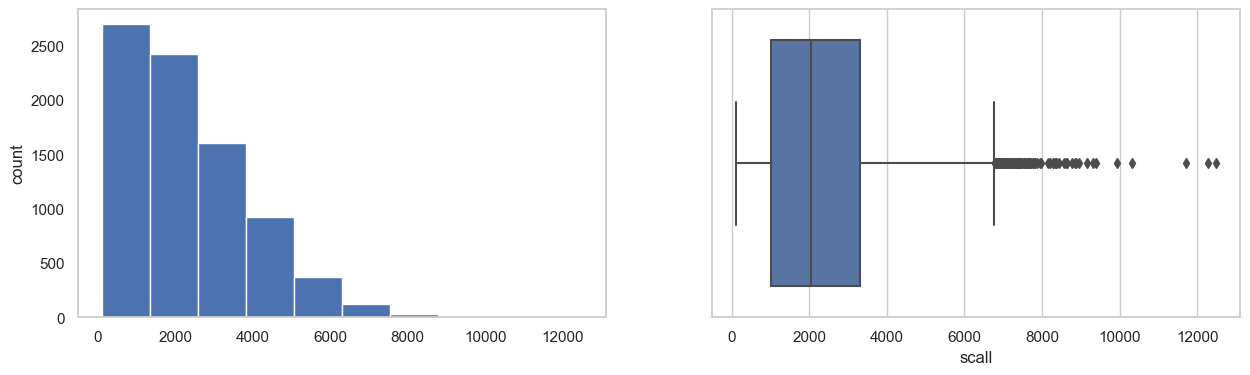

Description of sread
----------------------------------------------------------------------------
count    8192.000000
mean      210.479980
std       198.980146
min         6.000000
25%        86.000000
50%       166.000000
75%       279.000000
max      5318.000000
Name: sread, dtype: float64 

Skew : 5.46


Distribution of sread
----------------------------------------------------------------------------


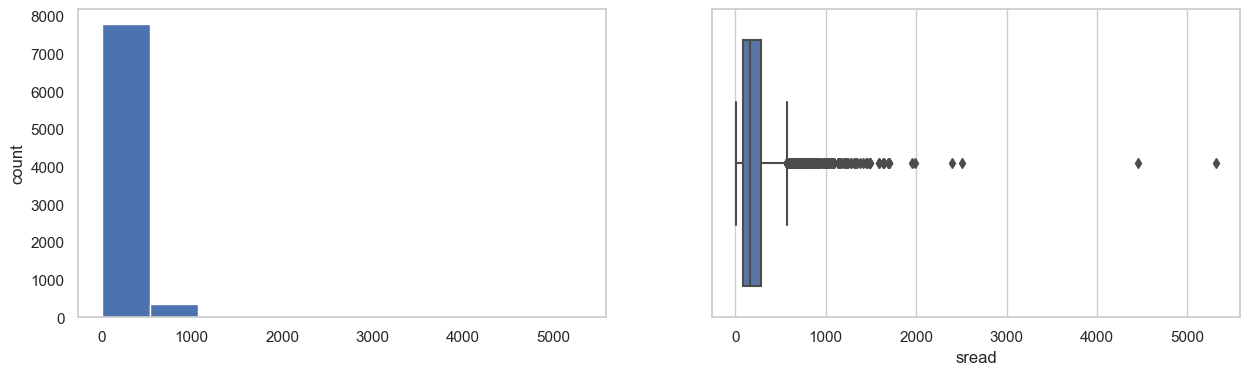

Description of swrite
----------------------------------------------------------------------------
count    8192.000000
mean      150.058228
std       160.478980
min         7.000000
25%        63.000000
50%       117.000000
75%       185.000000
max      5456.000000
Name: swrite, dtype: float64 

Skew : 9.61


Distribution of swrite
----------------------------------------------------------------------------


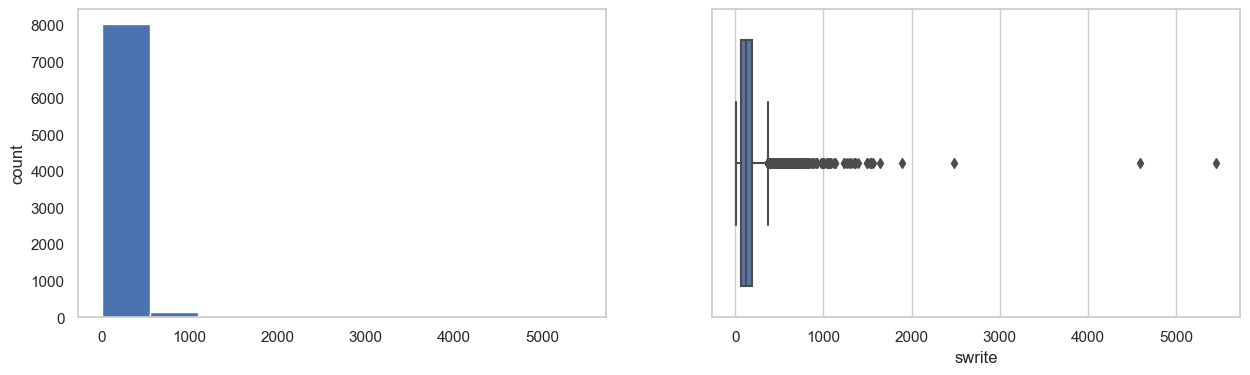

Description of fork
----------------------------------------------------------------------------
count    8192.000000
mean        1.884554
std         2.479493
min         0.000000
25%         0.400000
50%         0.800000
75%         2.200000
max        20.120000
Name: fork, dtype: float64 

Skew : 2.25


Distribution of fork
----------------------------------------------------------------------------


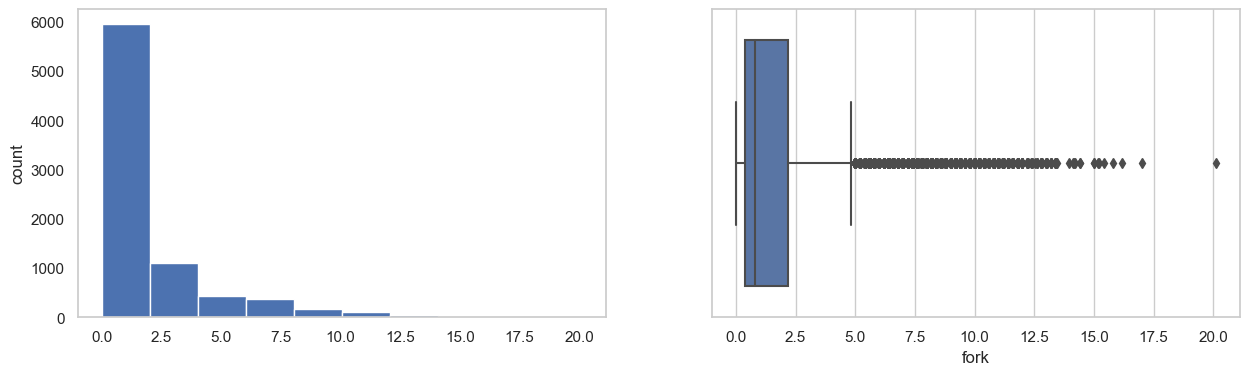

Description of exec
----------------------------------------------------------------------------
count    8192.000000
mean        2.791998
std         5.212456
min         0.000000
25%         0.200000
50%         1.200000
75%         2.800000
max        59.560000
Name: exec, dtype: float64 

Skew : 4.07


Distribution of exec
----------------------------------------------------------------------------


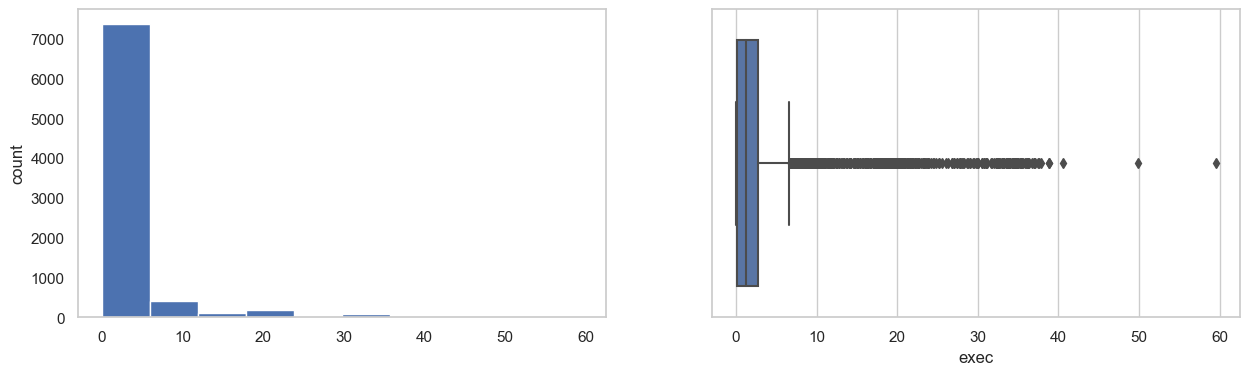

Description of rchar
----------------------------------------------------------------------------
count    8.088000e+03
mean     1.973857e+05
std      2.398375e+05
min      2.780000e+02
25%      3.409150e+04
50%      1.254735e+05
75%      2.678288e+05
max      2.526649e+06
Name: rchar, dtype: float64 

Skew : 2.85


Distribution of rchar
----------------------------------------------------------------------------


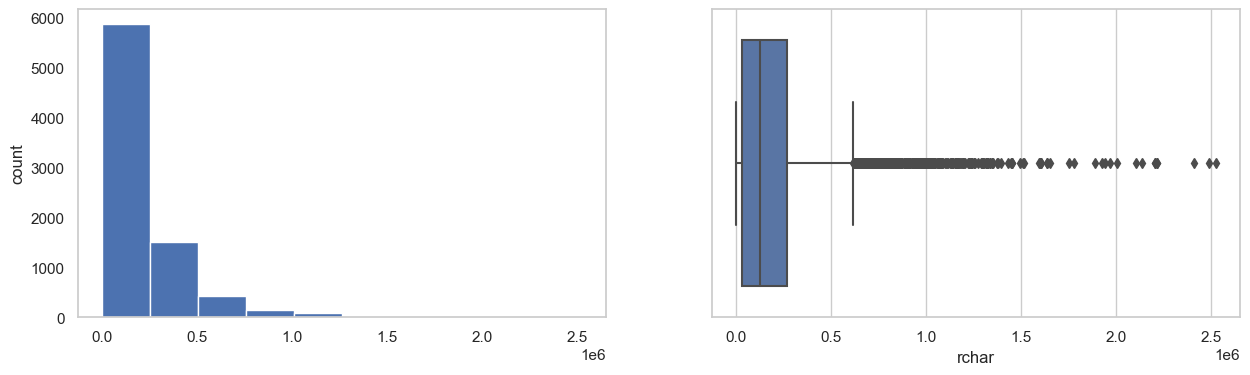

Description of wchar
----------------------------------------------------------------------------
count    8.177000e+03
mean     9.590299e+04
std      1.408417e+05
min      1.498000e+03
25%      2.291600e+04
50%      4.661900e+04
75%      1.061010e+05
max      1.801623e+06
Name: wchar, dtype: float64 

Skew : 3.85


Distribution of wchar
----------------------------------------------------------------------------


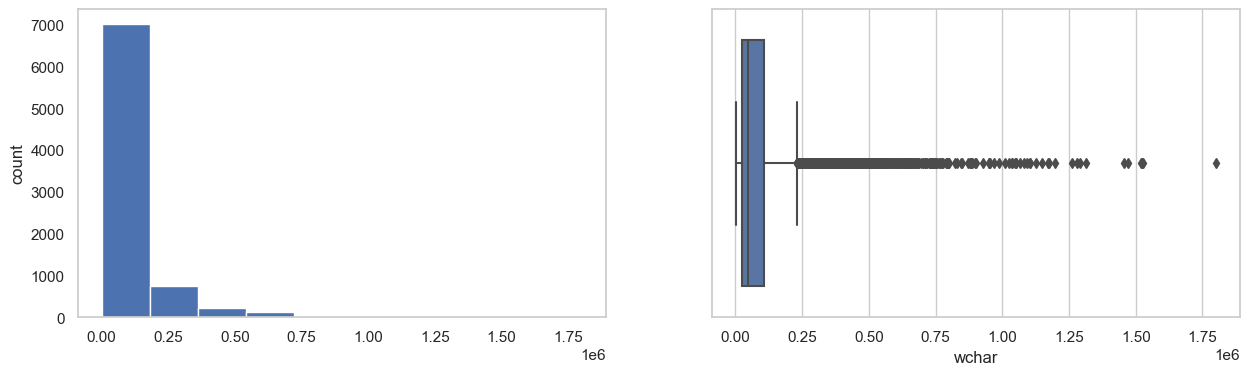

Description of pgout
----------------------------------------------------------------------------
count    8192.000000
mean        2.285317
std         5.307038
min         0.000000
25%         0.000000
50%         0.000000
75%         2.400000
max        81.440000
Name: pgout, dtype: float64 

Skew : 5.07


Distribution of pgout
----------------------------------------------------------------------------


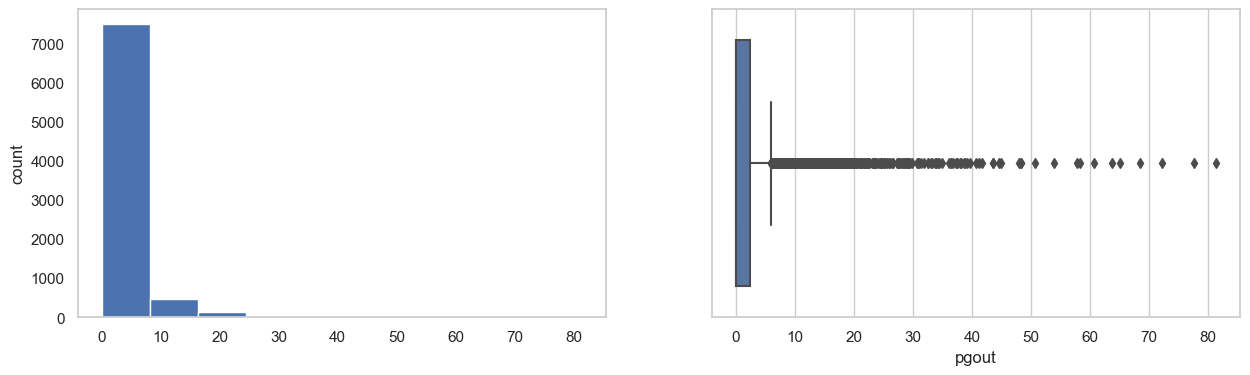

Description of ppgout
----------------------------------------------------------------------------
count    8192.000000
mean        5.977229
std        15.214590
min         0.000000
25%         0.000000
50%         0.000000
75%         4.200000
max       184.200000
Name: ppgout, dtype: float64 

Skew : 4.68


Distribution of ppgout
----------------------------------------------------------------------------


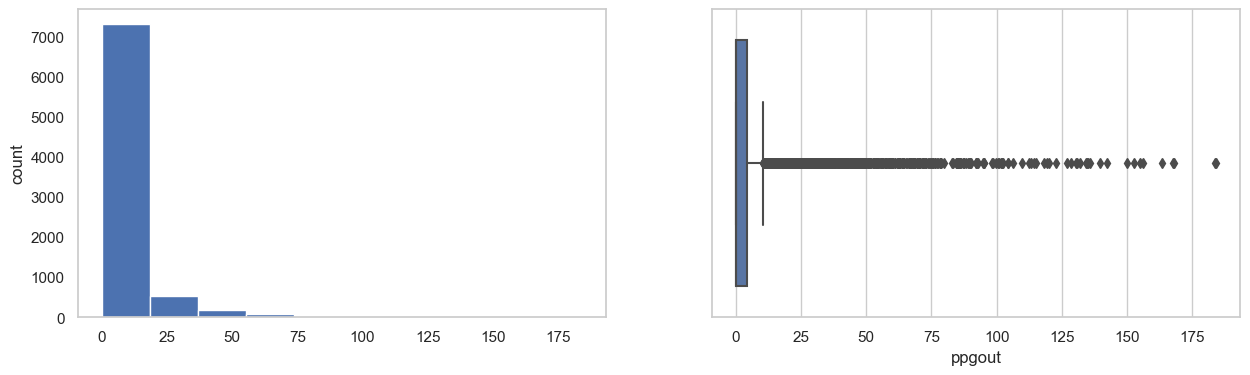

Description of pgfree
----------------------------------------------------------------------------
count    8192.000000
mean       11.919712
std        32.363520
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       523.000000
Name: pgfree, dtype: float64 

Skew : 4.77


Distribution of pgfree
----------------------------------------------------------------------------


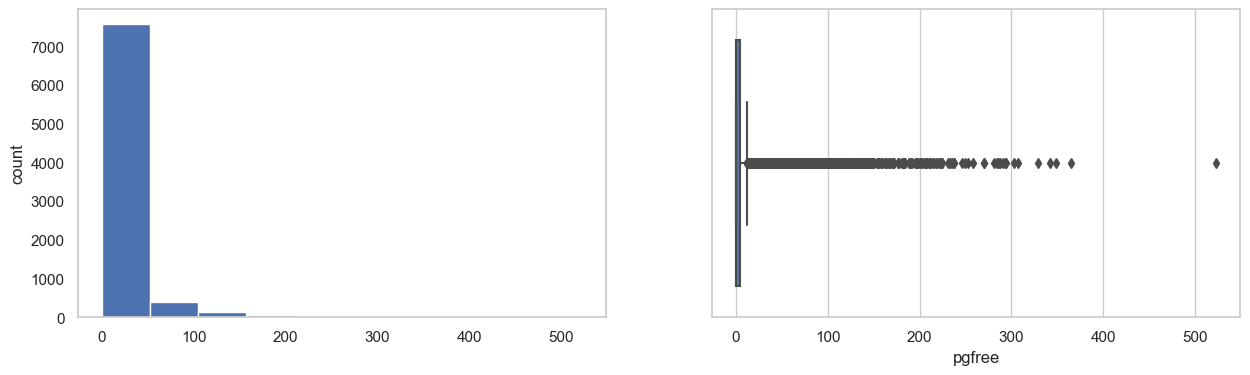

Description of pgscan
----------------------------------------------------------------------------
count    8192.000000
mean       21.526849
std        71.141340
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1237.000000
Name: pgscan, dtype: float64 

Skew : 5.81


Distribution of pgscan
----------------------------------------------------------------------------


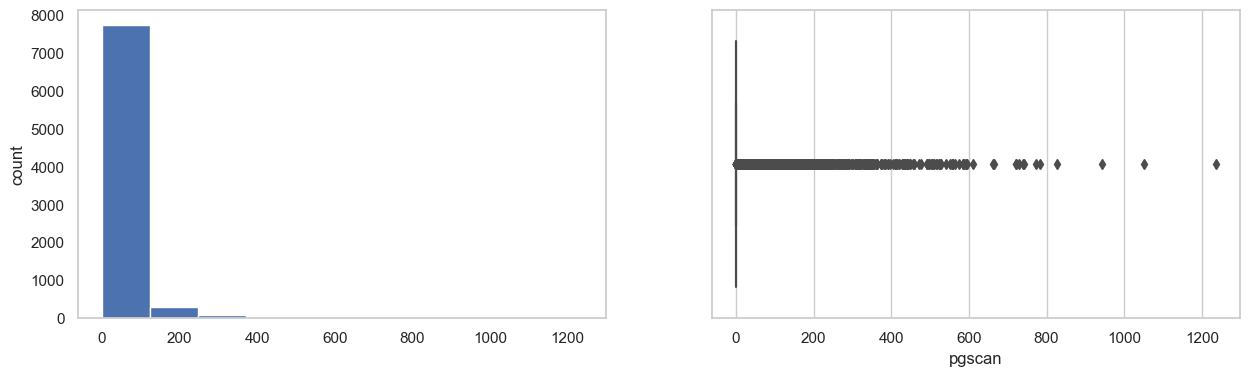

Description of atch
----------------------------------------------------------------------------
count    8192.000000
mean        1.127505
std         5.708347
min         0.000000
25%         0.000000
50%         0.000000
75%         0.600000
max       211.580000
Name: atch, dtype: float64 

Skew : 21.54


Distribution of atch
----------------------------------------------------------------------------


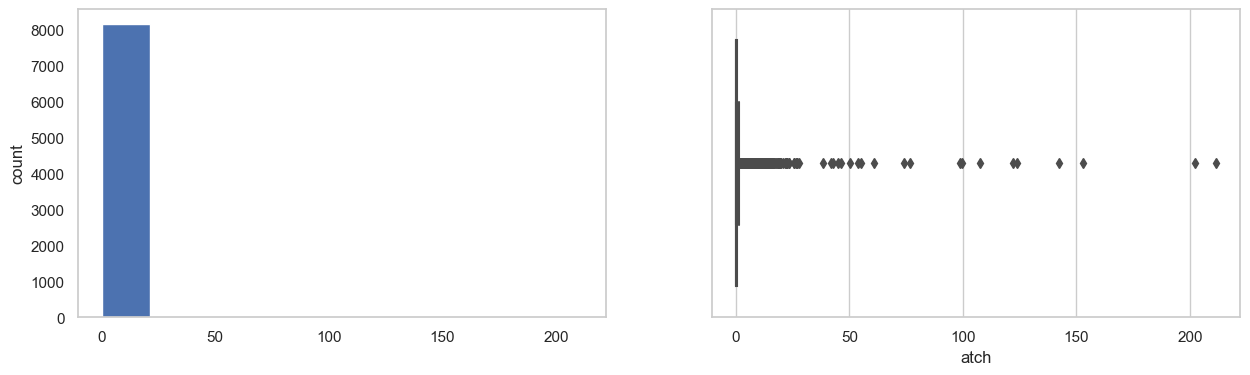

Description of pgin
----------------------------------------------------------------------------
count    8192.000000
mean        8.277960
std        13.874978
min         0.000000
25%         0.600000
50%         2.800000
75%         9.765000
max       141.200000
Name: pgin, dtype: float64 

Skew : 3.24


Distribution of pgin
----------------------------------------------------------------------------


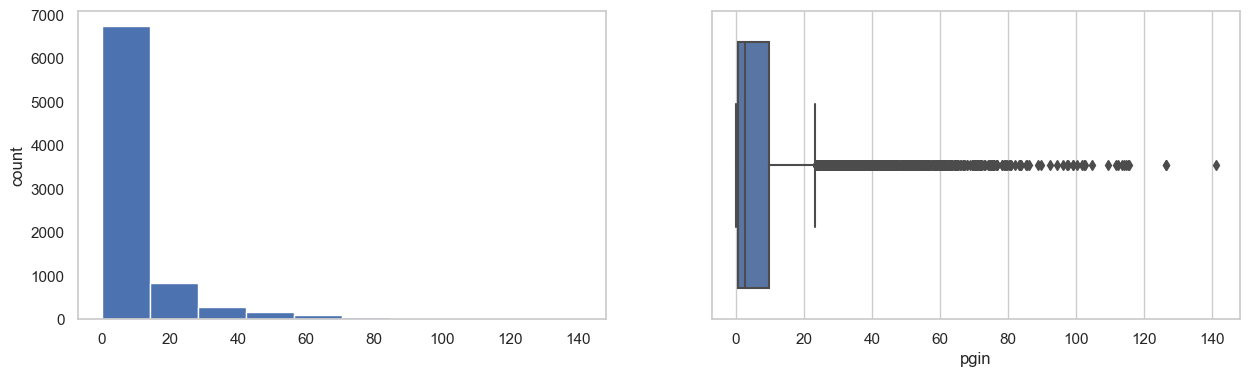

Description of ppgin
----------------------------------------------------------------------------
count    8192.000000
mean       12.388586
std        22.281318
min         0.000000
25%         0.600000
50%         3.800000
75%        13.800000
max       292.610000
Name: ppgin, dtype: float64 

Skew : 3.9


Distribution of ppgin
----------------------------------------------------------------------------


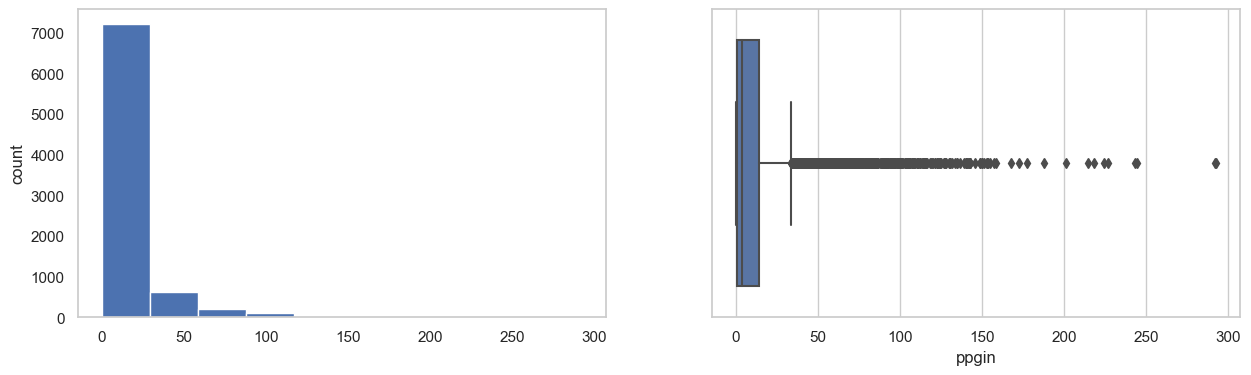

Description of pflt
----------------------------------------------------------------------------
count    8192.000000
mean      109.793799
std       114.419221
min         0.000000
25%        25.000000
50%        63.800000
75%       159.600000
max       899.800000
Name: pflt, dtype: float64 

Skew : 1.72


Distribution of pflt
----------------------------------------------------------------------------


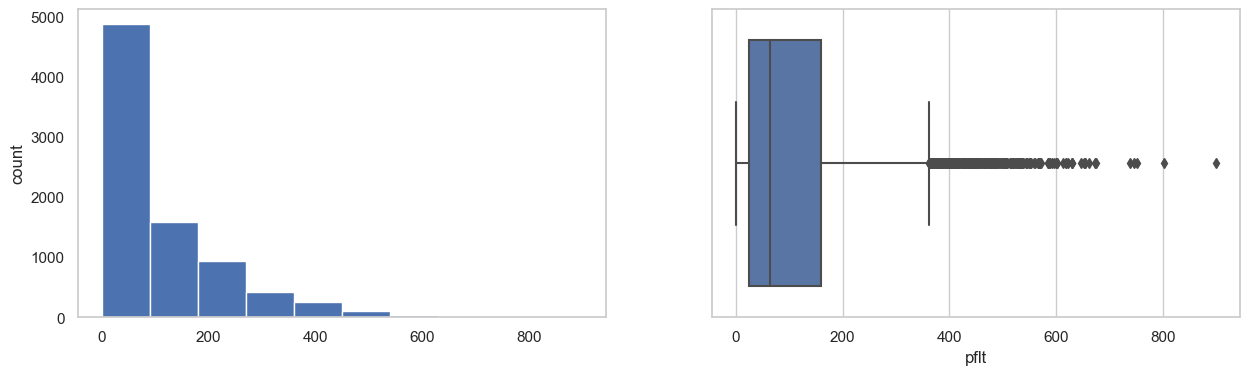

Description of vflt
----------------------------------------------------------------------------
count    8192.000000
mean      185.315796
std       191.000603
min         0.200000
25%        45.400000
50%       120.400000
75%       251.800000
max      1365.000000
Name: vflt, dtype: float64 

Skew : 1.74


Distribution of vflt
----------------------------------------------------------------------------


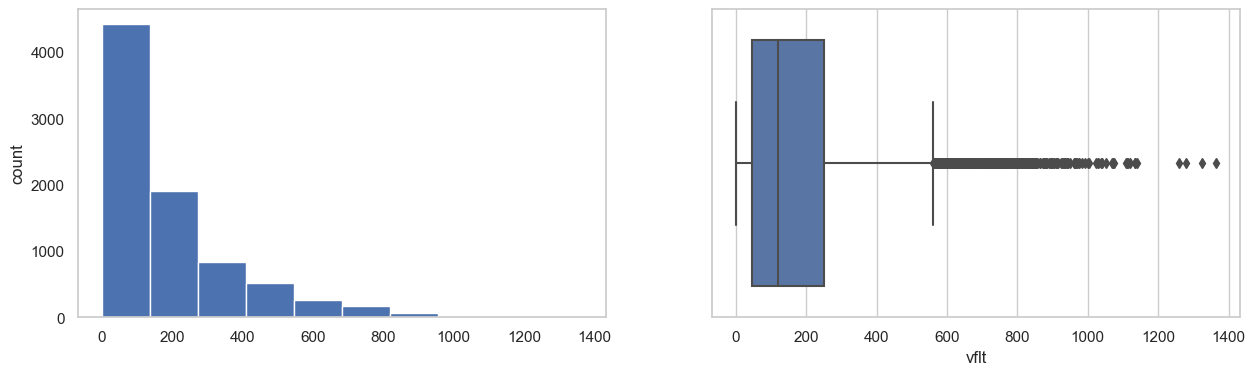

Description of freemem
----------------------------------------------------------------------------
count     8192.000000
mean      1763.456299
std       2482.104511
min         55.000000
25%        231.000000
50%        579.000000
75%       2002.250000
max      12027.000000
Name: freemem, dtype: float64 

Skew : 1.81


Distribution of freemem
----------------------------------------------------------------------------


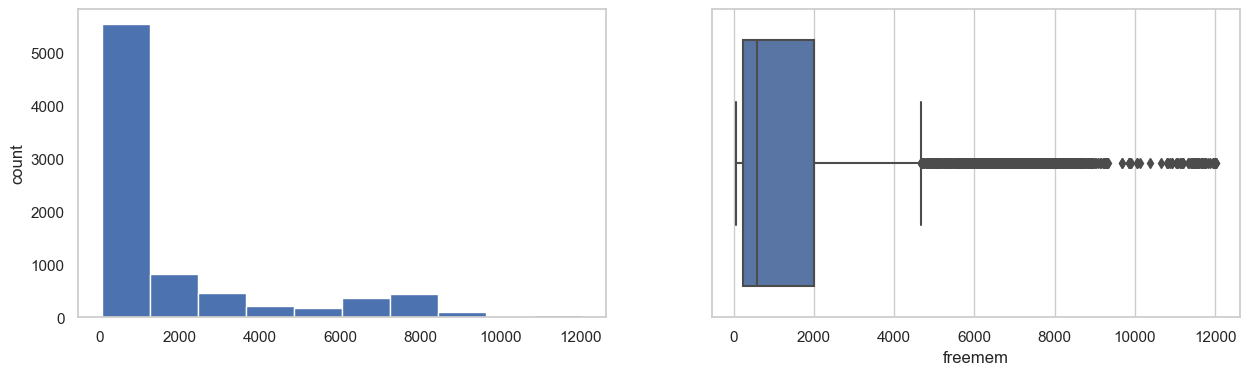

Description of freeswap
----------------------------------------------------------------------------
count    8.192000e+03
mean     1.328126e+06
std      4.220194e+05
min      2.000000e+00
25%      1.042624e+06
50%      1.289290e+06
75%      1.730380e+06
max      2.243187e+06
Name: freeswap, dtype: float64 

Skew : -0.79


Distribution of freeswap
----------------------------------------------------------------------------


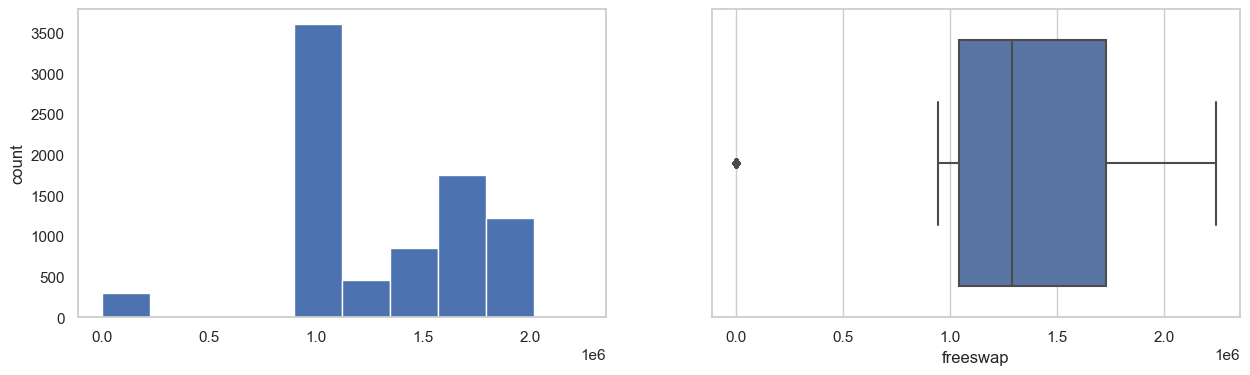

Description of usr
----------------------------------------------------------------------------
count    8192.000000
mean       83.968872
std        18.401905
min         0.000000
25%        81.000000
50%        89.000000
75%        94.000000
max        99.000000
Name: usr, dtype: float64 

Skew : -3.42


Distribution of usr
----------------------------------------------------------------------------


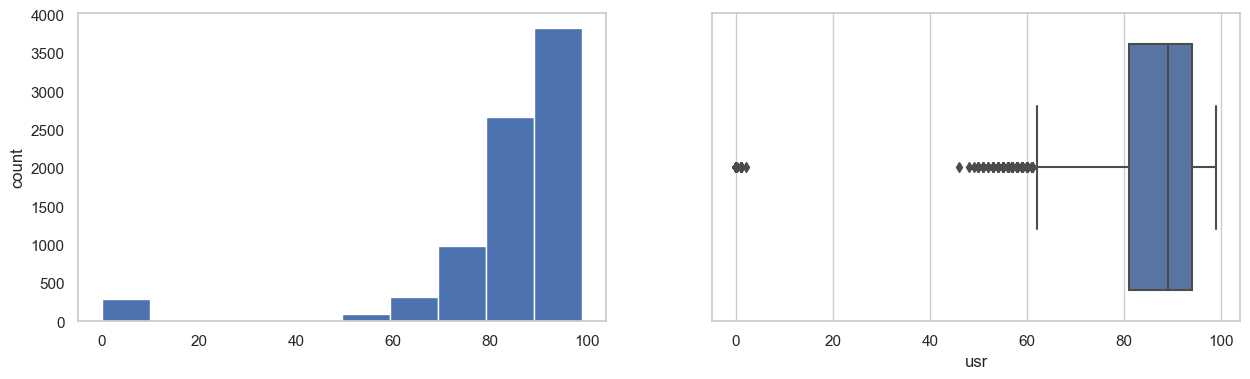

In [571]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [572]:
df_cat = df.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
lstcatcolumns

['runqsz']

In [573]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df_cat[cat_column].value_counts())
    plt.figure(figsize=(5,4))
    ax=df_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    #ax=sns.countplot(data=Auto_Motor_Company,x='Marital_status')
    ax.bar_label(ax.containers[0]);
    plt.show()
    print("       ")

Details of runqsz
----------------------------------------------------------------
Not_CPU_Bound    4331
CPU_Bound        3861
Name: runqsz, dtype: int64


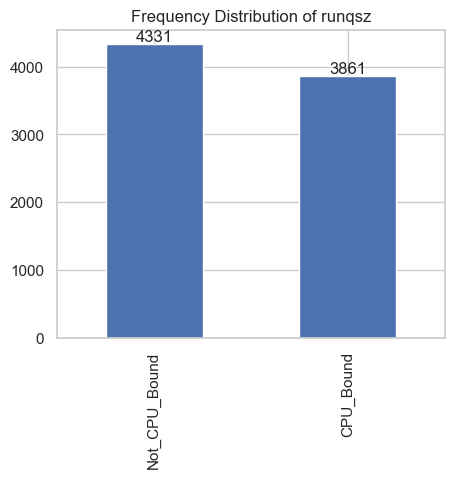

In [574]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

Bivariate analysis

C:\Users\prapthi.pandian\AppData\Local\Temp\ipykernel_9260\3819158856.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")


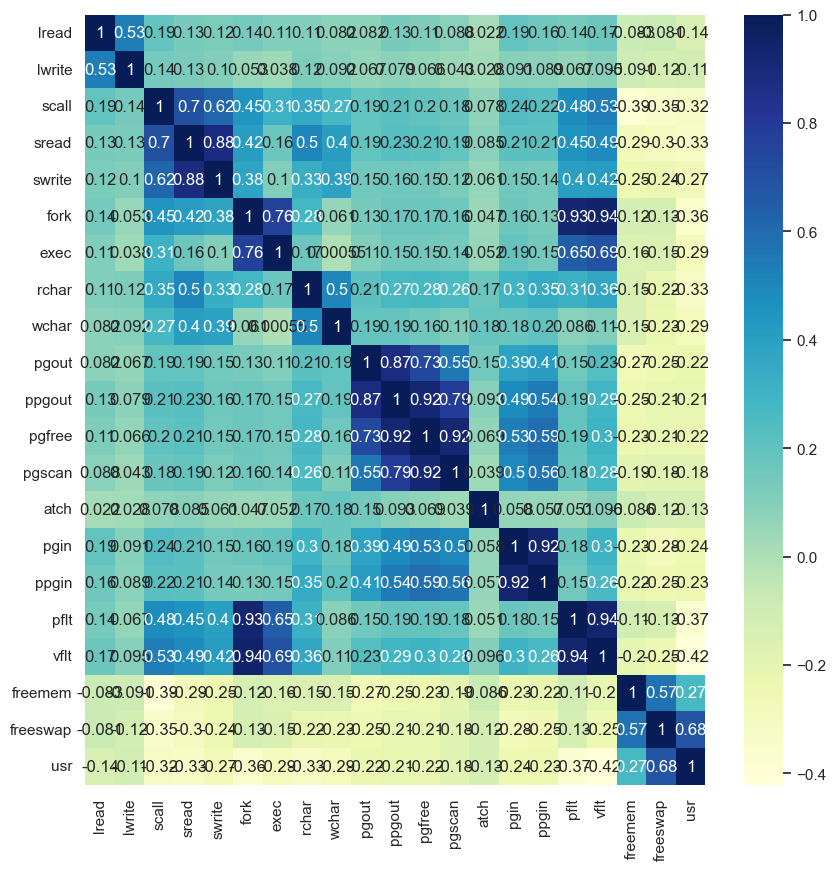

In [575]:
plt.figure(figsize  = (10,10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show();

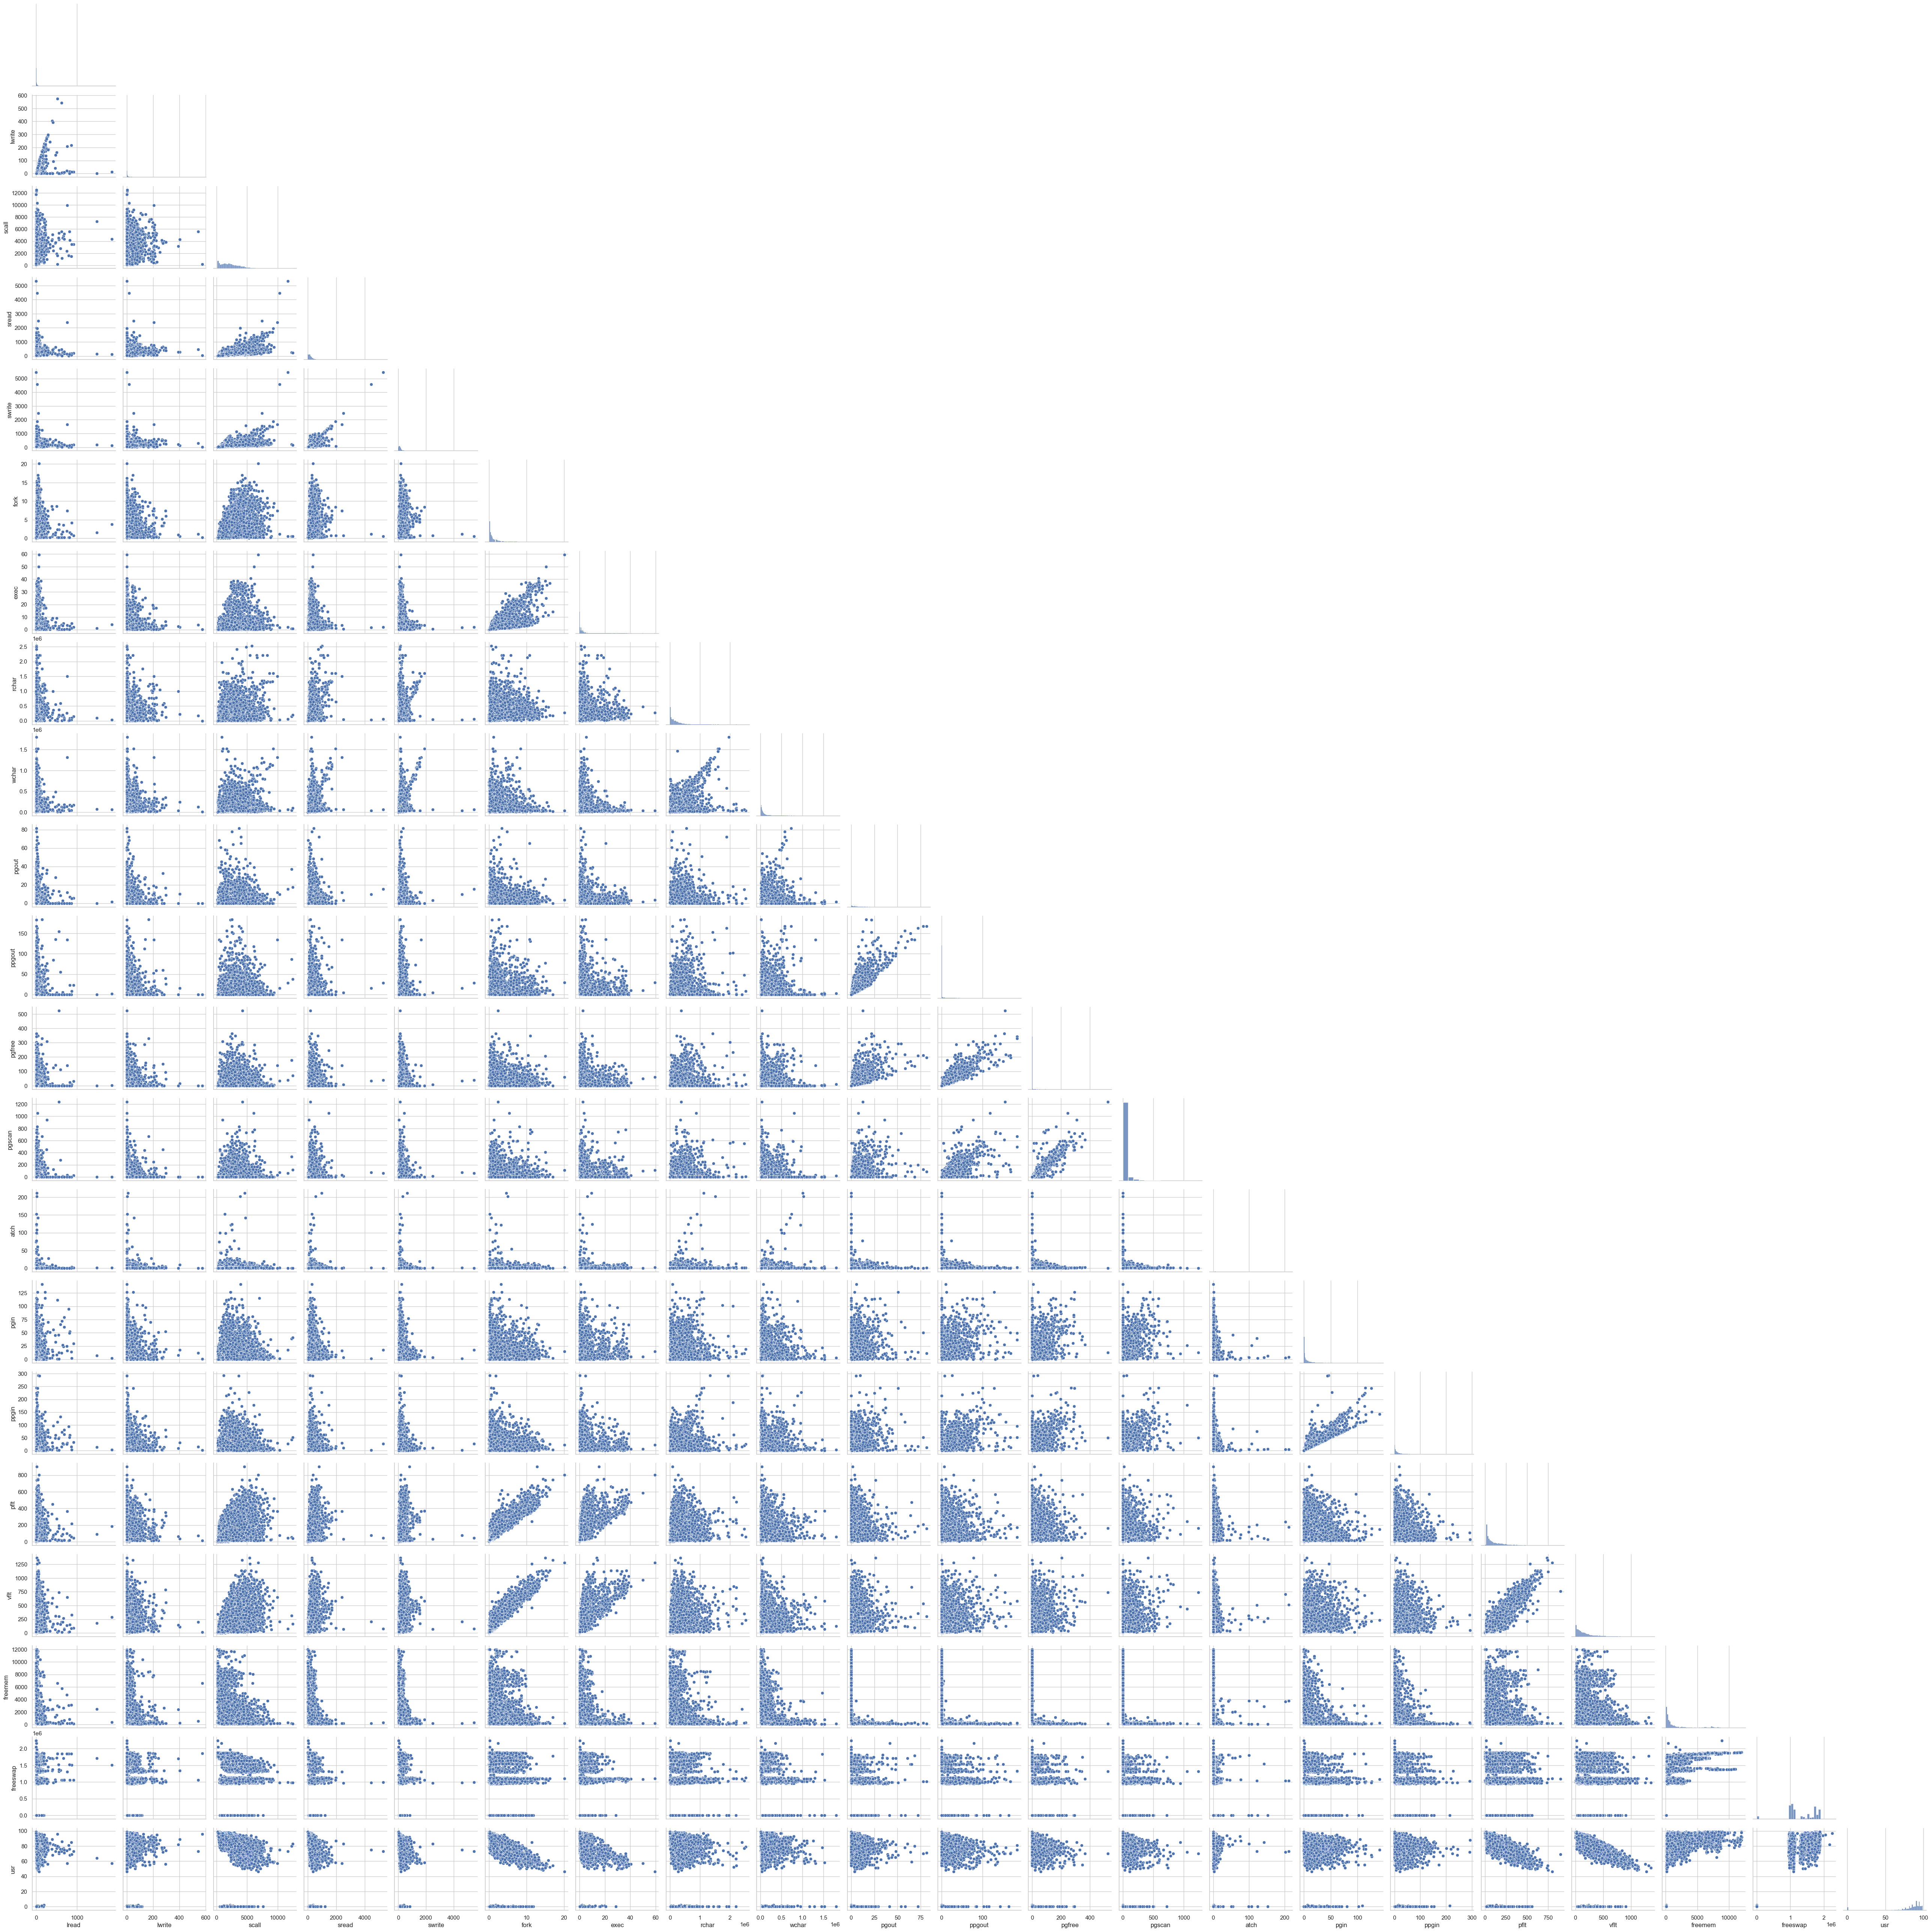

In [576]:
sns.pairplot(df_num, corner= True);

In [577]:
df.duplicated().sum()

0

In [578]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

RUNQSZ :  2
CPU_Bound        3861
Not_CPU_Bound    4331
Name: runqsz, dtype: int64




In [579]:
df = pd.get_dummies(df, columns=['runqsz'],drop_first=True)

In [580]:
df.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt  freemem  freeswap  usr  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40     4670   1730946   95   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83     7278   1869002   97   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20      702   1021237   87   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80     7248   1863704   98   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60      633   1760253   90   

   runqsz_Not_CPU_Bound  
0                     0  
1                     1  
2                     1  
3                     1  
4                     1  

[5 rows x 22 columns]

In [581]:
df.isnull().sum()

lread                     0
lwrite                    0
scall                     0
sread                     0
swrite                    0
fork                      0
exec                      0
rchar                   104
wchar                    15
pgout                     0
ppgout                    0
pgfree                    0
pgscan                    0
atch                      0
pgin                      0
ppgin                     0
pflt                      0
vflt                      0
freemem                   0
freeswap                  0
usr                       0
runqsz_Not_CPU_Bound      0
dtype: int64

In [582]:
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].median()
        df[column] = df[column].fillna(mean)    
        
df.isnull().sum()        

lread                   0
lwrite                  0
scall                   0
sread                   0
swrite                  0
fork                    0
exec                    0
rchar                   0
wchar                   0
pgout                   0
ppgout                  0
pgfree                  0
pgscan                  0
atch                    0
pgin                    0
ppgin                   0
pflt                    0
vflt                    0
freemem                 0
freeswap                0
usr                     0
runqsz_Not_CPU_Bound    0
dtype: int64

In [583]:
(df==0).sum()

lread                    675
lwrite                  2684
scall                      0
sread                      0
swrite                     0
fork                      21
exec                      21
rchar                      0
wchar                      0
pgout                   4878
ppgout                  4878
pgfree                  4869
pgscan                  6448
atch                    4575
pgin                    1220
ppgin                   1220
pflt                       3
vflt                       0
freemem                    0
freeswap                   0
usr                      283
runqsz_Not_CPU_Bound    3861
dtype: int64

### Outliers treatment

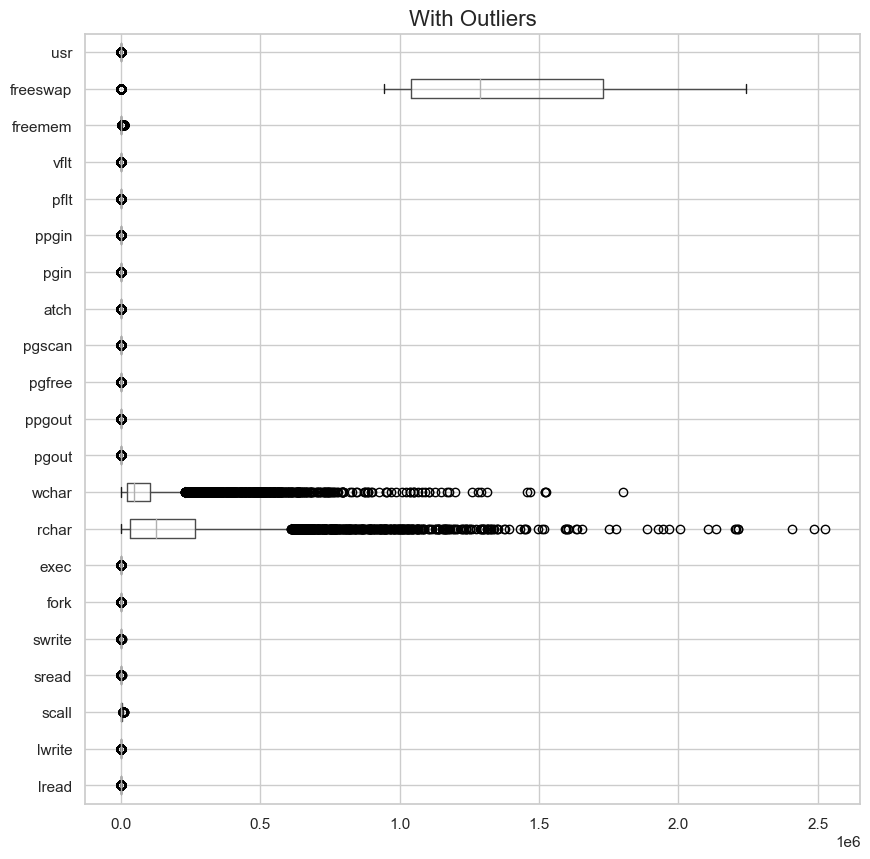

In [584]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show();

In [585]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [586]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

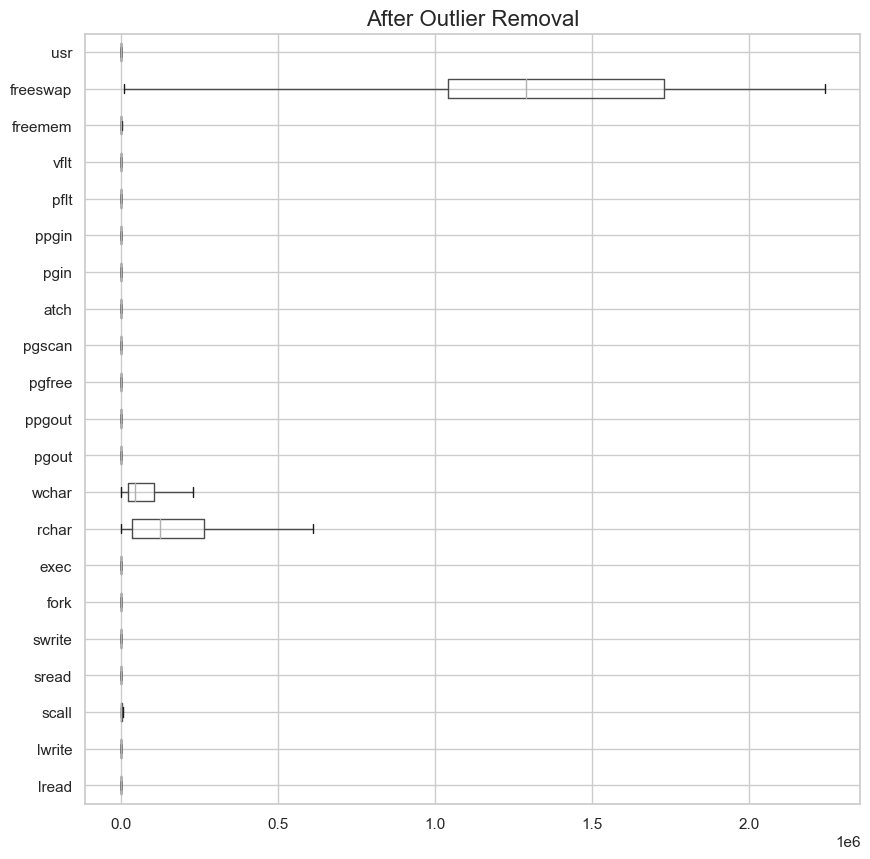

In [587]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show();

### Train-Test Split

In [588]:
# Copy all the predictor variables into X dataframe
X = df.drop('usr', axis=1)

# Copy target into the y dataframe. 
y = df[['usr']]

In [589]:
X.head()

lread  lwrite   scall  sread  swrite  fork  exec     rchar    wchar  pgout  \
0    1.0     0.0  2147.0   79.0    68.0   0.2   0.2   40671.0  53995.0    0.0   
1    0.0     0.0   170.0   18.0    21.0   0.2   0.2     448.0   8385.0    0.0   
2   15.0     3.0  2162.0  159.0   119.0   2.0   2.4  125473.5  31950.0    0.0   
3    0.0     0.0   160.0   12.0    16.0   0.2   0.2  125473.5   8670.0    0.0   
4    5.0     1.0   330.0   39.0    38.0   0.4   0.4  125473.5  12185.0    0.0   

   ...  pgfree  pgscan  atch  pgin  ppgin    pflt    vflt   freemem  \
0  ...     0.0     0.0   0.0   1.6    2.6   16.00   26.40  4659.125   
1  ...     0.0     0.0   0.0   0.0    0.0   15.63   16.83  4659.125   
2  ...     0.0     0.0   1.2   6.0    9.4  150.20  220.20   702.000   
3  ...     0.0     0.0   0.0   0.2    0.2   15.60   16.80  4659.125   
4  ...     0.0     0.0   0.0   1.0    1.2   37.80   47.60   633.000   

    freeswap  runqsz_Not_CPU_Bound  
0  1730946.0                     0  
1  1869002.0                     1  
2  1021237.0                     1  
3  1863704.0                     1  
4  1760253.0                     1  

[5 rows x 21 columns]

**We will now split X and y into train and test sets in a 70:30 ratio.**

In [590]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1)

### Linear Regression using statsmodel(OLS)

In [591]:
import statsmodels.api as sm

In [592]:
X_train=sm.add_constant(X_train)# This adds the constant term beta0 to the Simple Linear Regression.
X_test=sm.add_constant(X_test)

In [593]:
olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()

In [594]:
# let's print the regression summary
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1115.
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:16:46   Log-Likelihood:                -16657.
No. Observations:                5734   AIC:                         3.336e+04
Df Residuals:                    5713   BIC:                         3.350e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1217 

In [595]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   29.229332
lread                    5.350560
lwrite                   4.328397
scall                    2.960609
sread                    6.420172
swrite                   5.597135
fork                    13.035359
exec                     3.241417
rchar                    2.133616
wchar                    1.584381
pgout                   11.360363
ppgout                  29.404223
pgfree                  16.496748
pgscan                        NaN
atch                     1.875901
pgin                    13.809339
ppgin                   13.951855
pflt                    12.001460
vflt                    15.971049
freemem                  1.961304
freeswap                 1.841239
runqsz_Not_CPU_Bound     1.156815
dtype: float64



C:\Users\prapthi.pandian\AppData\Local\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


#### Let's remove/drop multicollinear columns one by one and observe the effect on our predictive model.

In [596]:
X_train2 = X_train.drop(["fork"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


* On dropping 'fork',   there is no impact on adj. R-squared

In [597]:
X_train3 = X_train.drop(["pgout"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train3)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


* On dropping 'pgout', there is no impact on adj. R-squared

In [598]:
X_train4 = X_train.drop(["ppgout"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train4)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


* On dropping 'ppgout',   there is no impact on adj. R-squared

In [599]:
X_train5 = X_train.drop(["pgfree"], axis=1)
olsmod_4 = sm.OLS(y_train, X_train5)
olsres_4 = olsmod_4.fit()
print(
    "R-squared:",
    np.round(olsres_4.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_4.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


* On dropping 'pgfree',   there is no impact on adj. R-squared

In [600]:
X_train6 = X_train.drop(["pgin"], axis=1)
olsmod_5 = sm.OLS(y_train, X_train6)
olsres_5 = olsmod_5.fit()
print(
    "R-squared:",
    np.round(olsres_5.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_5.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


* On dropping 'pgin',   there is no impact on adj. R-squared

In [601]:
X_train7 = X_train.drop(["ppgin"], axis=1)
olsmod_6 = sm.OLS(y_train, X_train7)
olsres_6 = olsmod_6.fit()
print(
    "R-squared:",
    np.round(olsres_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_6.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


* On dropping 'ppgin',   there is no impact on adj. R-squared

In [602]:
X_train8 = X_train.drop(["pflt"], axis=1)
olsmod_7 = sm.OLS(y_train, X_train8)
olsres_7 = olsmod_7.fit()
print(
    "R-squared:",
    np.round(olsres_7.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_7.rsquared_adj, 3),
)

R-squared: 0.786 
Adjusted R-squared: 0.785


In [603]:
0.795-0.785

0.010000000000000009

* On dropping 'pflt', adj. R-squared decresed by 0.010

In [604]:
X_train9 = X_train.drop(["vflt"], axis=1)
olsmod_8 = sm.OLS(y_train, X_train9)
olsres_8 = olsmod_8.fit()
print(
    "R-squared:",
    np.round(olsres_8.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_8.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


* On dropping 'vflt',   there is no impact on adj. R-squared

**Since there is no effect on adj. R-squared after dropping the columns- ppgout, we can remove it from the training set.**

In [605]:
X_train = X_train.drop([ "ppgout"], axis=1)

In [606]:
olsmod_9 = sm.OLS(y_train, X_train)
olsres_9 = olsmod_9.fit()
print(olsres_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1174.
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:17:06   Log-Likelihood:                -16658.
No. Observations:                5734   AIC:                         3.336e+04
Df Residuals:                    5714   BIC:                         3.349e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1477 

### Let's check if multicollinearity is still present in the data.

In [607]:
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const                   29.021961
lread                    5.350387
lwrite                   4.328325
scall                    2.960379
sread                    6.420135
swrite                   5.597025
fork                    13.027305
exec                     3.239231
rchar                    2.133614
wchar                    1.580894
pgout                    6.453978
pgfree                   6.172847
pgscan                        NaN
atch                     1.875553
pgin                    13.784007
ppgin                   13.898848
pflt                    12.001460
vflt                    15.966865
freemem                  1.959267
freeswap                 1.838167
runqsz_Not_CPU_Bound     1.156421
dtype: float64



C:\Users\prapthi.pandian\AppData\Local\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [608]:
X_train10 = X_train.drop(["fork"], axis=1)
olsmod_10 = sm.OLS(y_train, X_train10)
olsres_10 = olsmod_10.fit()
print(
    "R-squared:",
    np.round(olsres_10.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_10.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [609]:
X_train11 = X_train.drop(["pgin"], axis=1)
olsmod_11 = sm.OLS(y_train, X_train11)
olsres_11 = olsmod_11.fit()
print(
    "R-squared:",
    np.round(olsres_11.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_11.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [610]:
X_train12 = X_train.drop(["ppgin"], axis=1)
olsmod_12 = sm.OLS(y_train, X_train12)
olsres_12 = olsmod_12.fit()
print(
    "R-squared:",
    np.round(olsres_12.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_12.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [611]:
X_train13 = X_train.drop(["pflt"], axis=1)
olsmod_13 = sm.OLS(y_train, X_train13)
olsres_13 = olsmod_13.fit()
print(
    "R-squared:",
    np.round(olsres_13.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_13.rsquared_adj, 3),
)

R-squared: 0.786 
Adjusted R-squared: 0.785


In [612]:
X_train14 = X_train.drop(["vflt"], axis=1)
olsmod_14 = sm.OLS(y_train, X_train14)
olsres_14 = olsmod_14.fit()
print(
    "R-squared:",
    np.round(olsres_14.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_14.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [613]:
X_train = X_train.drop(["vflt"], axis=1)

In [614]:
olsmod_15 = sm.OLS(y_train, X_train)
olsres_15 = olsmod_15.fit()
print(olsres_15.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1235.
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:17:13   Log-Likelihood:                -16665.
No. Observations:                5734   AIC:                         3.337e+04
Df Residuals:                    5715   BIC:                         3.349e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.0090 

In [615]:
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series3))

VIF values: 

const                   28.641818
lread                    5.335455
lwrite                   4.327130
scall                    2.952947
sread                    6.374687
swrite                   5.595777
fork                    10.089700
exec                     3.235396
rchar                    2.123783
wchar                    1.558923
pgout                    6.450724
pgfree                   6.149223
pgscan                        NaN
atch                     1.864254
pgin                    13.602134
ppgin                   13.898845
pflt                     9.131802
freemem                  1.957966
freeswap                 1.787695
runqsz_Not_CPU_Bound     1.156363
dtype: float64



C:\Users\prapthi.pandian\AppData\Local\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [616]:
X_train15 = X_train.drop(["fork"], axis=1)
olsmod_16 = sm.OLS(y_train, X_train15)
olsres_16 = olsmod_16.fit()
print(
    "R-squared:",
    np.round(olsres_16.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_16.rsquared_adj, 3),
)

R-squared: 0.795 
Adjusted R-squared: 0.795


In [617]:
X_train16 = X_train.drop(["pgin"], axis=1)
olsmod_17 = sm.OLS(y_train, X_train16)
olsres_17 = olsmod_17.fit()
print(
    "R-squared:",
    np.round(olsres_17.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_17.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [618]:
X_train17 = X_train.drop(["ppgin"], axis=1)
olsmod_18 = sm.OLS(y_train, X_train17)
olsres_18 = olsmod_18.fit()
print(
    "R-squared:",
    np.round(olsres_18.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_18.rsquared_adj, 3),
)

R-squared: 0.795 
Adjusted R-squared: 0.795


In [619]:
X_train18 = X_train.drop(["pflt"], axis=1)
olsmod_19 = sm.OLS(y_train, X_train18)
olsres_19 = olsmod_19.fit()
print(
    "R-squared:",
    np.round(olsres_19.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_19.rsquared_adj, 3),
)

R-squared: 0.779 
Adjusted R-squared: 0.778


In [620]:
X_train = X_train.drop(["ppgin"], axis=1)

In [621]:
olsmod_20 = sm.OLS(y_train, X_train)
olsres_20 = olsmod_20.fit()
print(olsres_20.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1305.
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:17:17   Log-Likelihood:                -16671.
No. Observations:                5734   AIC:                         3.338e+04
Df Residuals:                    5716   BIC:                         3.350e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.0531 

In [622]:
vif_series4 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series4))

VIF values: 

const                   28.594882
lread                    5.304009
lwrite                   4.316362
scall                    2.951826
sread                    6.374556
swrite                   5.595670
fork                    10.074886
exec                     3.235387
rchar                    2.090401
wchar                    1.558921
pgout                    6.445478
pgfree                   6.093623
pgscan                        NaN
atch                     1.863536
pgin                     1.529142
pflt                     9.131545
freemem                  1.957713
freeswap                 1.785393
runqsz_Not_CPU_Bound     1.155990
dtype: float64



C:\Users\prapthi.pandian\AppData\Local\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [623]:
X_train = X_train.drop(["fork"], axis=1)

In [624]:
olsmod_21 = sm.OLS(y_train, X_train)
olsres_21 = olsmod_21.fit()
print(olsres_21.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1386.
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:17:19   Log-Likelihood:                -16672.
No. Observations:                5734   AIC:                         3.338e+04
Df Residuals:                    5717   BIC:                         3.349e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.0913 

In [625]:
vif_series5 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series5))

VIF values: 

const                   28.440419
lread                    5.285069
lwrite                   4.298019
scall                    2.914853
sread                    6.373458
swrite                   5.390263
exec                     2.856973
rchar                    2.089364
wchar                    1.550686
pgout                    6.445377
pgfree                   6.093041
pgscan                        NaN
atch                     1.862553
pgin                     1.526800
pflt                     3.458168
freemem                  1.957226
freeswap                 1.782829
runqsz_Not_CPU_Bound     1.155448
dtype: float64



C:\Users\prapthi.pandian\AppData\Local\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [626]:
X_train19 = X_train.drop(["lread"], axis=1)
olsmod_22 = sm.OLS(y_train, X_train19)
olsres_22 = olsmod_22.fit()
print(
    "R-squared:",
    np.round(olsres_22.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_22.rsquared_adj, 3),
)

R-squared: 0.793 
Adjusted R-squared: 0.792


In [627]:
X_train20 = X_train.drop(["sread"], axis=1)
olsmod_23 = sm.OLS(y_train, X_train20)
olsres_23 = olsmod_23.fit()
print(
    "R-squared:",
    np.round(olsres_23.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_23.rsquared_adj, 3),
)

R-squared: 0.795 
Adjusted R-squared: 0.794


In [628]:
X_train21 = X_train.drop(["swrite"], axis=1)
olsmod_24 = sm.OLS(y_train, X_train21)
olsres_24 = olsmod_24.fit()
print(
    "R-squared:",
    np.round(olsres_24.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_24.rsquared_adj, 3),
)

R-squared: 0.794 
Adjusted R-squared: 0.794


In [629]:
X_train22 = X_train.drop(["pgout"], axis=1)
olsmod_25 = sm.OLS(y_train, X_train22)
olsres_25 = olsmod_25.fit()
print(
    "R-squared:",
    np.round(olsres_25.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_25.rsquared_adj, 3),
)

R-squared: 0.794 
Adjusted R-squared: 0.793


In [630]:
X_train23 = X_train.drop(["pgfree"], axis=1)
olsmod_26 = sm.OLS(y_train, X_train23)
olsres_26 = olsmod_26.fit()
print(
    "R-squared:",
    np.round(olsres_26.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_26.rsquared_adj, 3),
)

R-squared: 0.795 
Adjusted R-squared: 0.794


In [631]:
X_train = X_train.drop(["sread"], axis=1)

In [632]:
olsmod_27 = sm.OLS(y_train, X_train)
olsres_27 = olsmod_27.fit()
print(olsres_27.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1478.
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:17:25   Log-Likelihood:                -16672.
No. Observations:                5734   AIC:                         3.338e+04
Df Residuals:                    5718   BIC:                         3.348e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.0916 

In [633]:
vif_series6 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series6))

VIF values: 

const                   28.366808
lread                    5.277543
lwrite                   4.288733
scall                    2.657189
swrite                   3.013887
exec                     2.850220
rchar                    1.673113
wchar                    1.537416
pgout                    6.444663
pgfree                   6.092363
pgscan                        NaN
atch                     1.861273
pgin                     1.525797
pflt                     3.436271
freemem                  1.956658
freeswap                 1.769115
runqsz_Not_CPU_Bound     1.155441
dtype: float64



C:\Users\prapthi.pandian\AppData\Local\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [634]:
X_train = X_train.drop(["pgfree"], axis=1)

In [635]:
olsmod_28 = sm.OLS(y_train, X_train)
olsres_28 = olsmod_28.fit()
print(olsres_28.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1584.
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:17:28   Log-Likelihood:                -16673.
No. Observations:                5734   AIC:                         3.338e+04
Df Residuals:                    5719   BIC:                         3.348e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.0919 

In [636]:
vif_series7 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series7))

VIF values: 

const                   28.366778
lread                    5.272488
lwrite                   4.282984
scall                    2.653943
swrite                   3.012451
exec                     2.847353
rchar                    1.672481
wchar                    1.537067
pgout                    2.029172
pgscan                        NaN
atch                     1.860242
pgin                     1.497984
pflt                     3.436202
freemem                  1.945888
freeswap                 1.767780
runqsz_Not_CPU_Bound     1.155214
dtype: float64



C:\Users\prapthi.pandian\AppData\Local\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [637]:
X_train24 = X_train.drop(["pgscan"], axis=1)

In [638]:
olsmod_29 = sm.OLS(y_train, X_train24)
olsres_29 = olsmod_29.fit()
print(olsres_29.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1584.
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:17:30   Log-Likelihood:                -16673.
No. Observations:                5734   AIC:                         3.338e+04
Df Residuals:                    5719   BIC:                         3.348e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.0919 

In [639]:
vif_series8 = pd.Series(
    [variance_inflation_factor(X_train24.values, i) for i in range(X_train24.shape[1])],
    index=X_train24.columns,
)
print("VIF values: \n\n{}\n".format(vif_series8))

VIF values: 

const                   28.366778
lread                    5.272488
lwrite                   4.282984
scall                    2.653943
swrite                   3.012451
exec                     2.847353
rchar                    1.672481
wchar                    1.537067
pgout                    2.029172
atch                     1.860242
pgin                     1.497984
pflt                     3.436202
freemem                  1.945888
freeswap                 1.767780
runqsz_Not_CPU_Bound     1.155214
dtype: float64



**After dropping the features causing strong multicollinearity and the statistically insignificant ones, our model performance hasn't dropped sharply . This shows that these variables did not have much predictive power.**

##### For Linear Regression, we need to check if the following assumptions hold:-

1. Linearity 
2. Independence 
3. Homoscedasticity
4. Normality of error terms
5. No strong Multicollinearity

#### Linearity and Independence of predictors 

In [640]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_29.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_29.resid.values  # residuals

df_pred.head()



Actual Values  Fitted Values  Residuals
0           91.0      91.113529  -0.113529
1           94.0      91.759078   2.240922
2           61.5      74.472389 -12.972389
3           83.0      80.847453   2.152547
4           94.0      98.258662  -4.258662

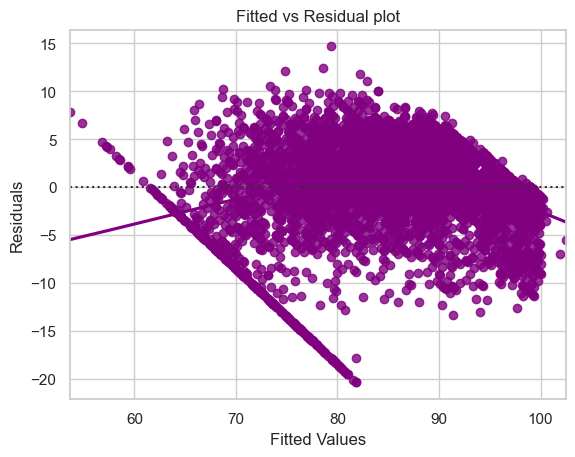

In [641]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals",color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show();

### TEST FOR NORMALITY

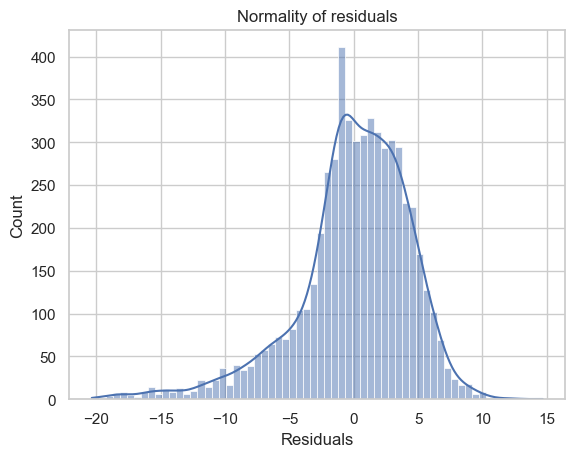

In [642]:
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show();

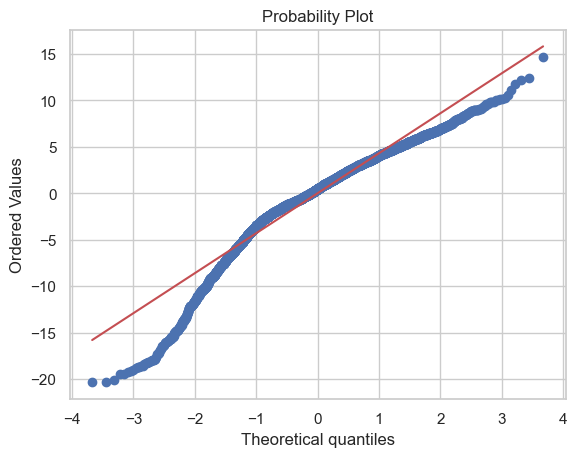

In [643]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show();

In [644]:
stats.shapiro(df_pred["Residuals"])

C:\Users\prapthi.pandian\AppData\Local\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9426858425140381, pvalue=1.6409205017243608e-42)

### TEST FOR HOMOSCEDASTICITY

In [645]:
import statsmodels.stats.api as sms
sms.het_goldfeldquandt(df_pred["Residuals"], X_train24)[1]

0.0013810641992204242

In [646]:
olsres_29.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1584.
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:17:45   Log-Likelihood:                -16673.
No. Observations:                5734   AIC:                         3.338e+04
Df Residuals:                    5719   BIC:                         3.348e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.0919      0.312    269.420      0.000      83.480      84.704
lread                   -0.0684      0.009     -7.653      0.000      -0.086      -0.051
lwrite                   0.0523      0.013      3.995      0.000       0.027       0.078
scall                   -0.0007   5.96e-05    -11.111      0.000      -0.001      -0.001
swrite                  -0.0058      0.001     -5.481      0.000      -0.008      -0.004
exec                    -0.3568      0.049     -7.355      0.000      -0.452      -0.262
rchar                -5.511e-06   4.33e-07    -12.740      0.000   -6.36e-06   -4.66e-06
wchar                -4.872e-06   1.02e-06     -4.779      0.000   -6.87e-06   -2.87e-06
pgout                   -0.3540      0.038     -9.287      0.000      -0.429      -0.279
atch                     0.6055      0.143      4.247      0.000       0.326       0.885
pgin                    -0.0820      0.009     -8.730      0.000      -0.100      -0.064
pflt                    -0.0396      0.001    -37.292      0.000      -0.042      -0.038
freemem                 -0.0005   5.06e-05     -9.328      0.000      -0.001      -0.000
freeswap              8.915e-06   1.87e-07     47.769      0.000    8.55e-06    9.28e-06
runqsz_Not_CPU_Bound     1.5953      0.126     12.641      0.000       1.348       1.843
==============================================================================
Omnibus:                     1045.912   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2203.816
Skew:                          -1.073   Prob(JB):                         0.00
Kurtosis:                       5.150   Cond. No.                     7.61e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.61e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Predictions

### Let's print the linear regression equation.

In [647]:
# let's check the model parameters
olsres_29.params

const                   84.091909
lread                   -0.068353
lwrite                   0.052254
scall                   -0.000662
swrite                  -0.005784
exec                    -0.356754
rchar                   -0.000006
wchar                   -0.000005
pgout                   -0.354035
atch                     0.605472
pgin                    -0.081959
pflt                    -0.039630
freemem                 -0.000472
freeswap                 0.000009
runqsz_Not_CPU_Bound     1.595320
dtype: float64

#### The model equation will be as follows:

In [648]:
# Let us write the equation of linear regression
Equation = "usr ="
print(Equation, end=" ")
for i in range(len(X_train24.columns)):
    if i == 0:
        print(olsres_29.params[i], "+", end=" ")
    elif i != len(X_train24.columns) - 1:
        print(
            olsres_29.params[i],
            "* (",
            X_train24.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_29.params[i], "* (", X_train24.columns[i], ")")

usr = 84.09190904813205 + -0.06835253681476533 * ( lread ) +  0.052254429104223274 * ( lwrite ) +  -0.0006624251874706158 * ( scall ) +  -0.005784330295337882 * ( swrite ) +  -0.35675411777005817 * ( exec ) +  -5.511271370539362e-06 * ( rchar ) +  -4.872076935688007e-06 * ( wchar ) +  -0.3540346808159861 * ( pgout ) +  0.6054715199799747 * ( atch ) +  -0.0819586493033359 * ( pgin ) +  -0.03963012164835577 * ( pflt ) +  -0.0004723752262174181 * ( freemem ) +  8.91524623463361e-06 * ( freeswap ) +  1.5953196246012888 * ( runqsz_Not_CPU_Bound )


In [649]:
X_train24.columns

Index(['const', 'lread', 'lwrite', 'scall', 'swrite', 'exec', 'rchar', 'wchar',
       'pgout', 'atch', 'pgin', 'pflt', 'freemem', 'freeswap',
       'runqsz_Not_CPU_Bound'],
      dtype='object')

In [650]:
X_test.columns

Index(['const', 'lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec',
       'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin',
       'ppgin', 'pflt', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound'],
      dtype='object')

In [651]:
# dropping columns from the test data that are not there in the training data
X_test2 = X_test.drop(
    ["sread", "fork", "ppgout", "pgfree", "pgfree", "pgscan", "ppgin", "vflt"], axis=1
)

In [652]:
X_test2.columns

Index(['const', 'lread', 'lwrite', 'scall', 'swrite', 'exec', 'rchar', 'wchar',
       'pgout', 'atch', 'pgin', 'pflt', 'freemem', 'freeswap',
       'runqsz_Not_CPU_Bound'],
      dtype='object')

In [653]:
olsres_29.params


const                   84.091909
lread                   -0.068353
lwrite                   0.052254
scall                   -0.000662
swrite                  -0.005784
exec                    -0.356754
rchar                   -0.000006
wchar                   -0.000005
pgout                   -0.354035
atch                     0.605472
pgin                    -0.081959
pflt                    -0.039630
freemem                 -0.000472
freeswap                 0.000009
runqsz_Not_CPU_Bound     1.595320
dtype: float64

In [654]:
# let's make predictions on the test set
y_pred_test = olsres_29.predict(X_test2)
y_pred_train = olsres_29.predict(X_train24)

In [655]:
# let's check the RMSE on the train data
rmse1 = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse1

4.431792450848492

In [656]:
# let's check the RMSE on the test data
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred_test))
rmse2

4.671697953091259

In [657]:
# let's check the MAE on the train data
mae1 = mean_absolute_error(y_train, y_pred_train)
mae1

3.2945284938678556

In [658]:
# let's check the MAE on the test data
mae2 = mean_absolute_error(y_test, y_pred_test)
mae2

3.38956487950438

### Linear Regression using (sklearn)

In [659]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train24, y_train)

LinearRegression()

In [660]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train24.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for const is 0.0
The coefficient for lread is -0.0683525368148109
The coefficient for lwrite is 0.052254429104294
The coefficient for scall is -0.0006624251874710465
The coefficient for swrite is -0.005784330295333583
The coefficient for exec is -0.3567541177697449
The coefficient for rchar is -5.511271370559487e-06
The coefficient for wchar is -4.8720769356044836e-06
The coefficient for pgout is -0.354034680816096
The coefficient for atch is 0.605471519979
The coefficient for pgin is -0.08195864930327641
The coefficient for pflt is -0.03963012164835959
The coefficient for freemem is -0.0004723752262185039
The coefficient for freeswap is 8.915246234657195e-06
The coefficient for runqsz_Not_CPU_Bound is 1.5953196246013068


In [661]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 84.09190904806592


In [662]:
# R square on training data
regression_model.score(X_train24, y_train)

0.7949761695805909

In [663]:
# R square on testing data
regression_model.score(X_test2, y_test)

0.7657904864538216

In [664]:
#RMSE on Training data

predicted_train=regression_model.fit(X_train24, y_train).predict(X_train24)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

4.431792450848491

In [665]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train24, y_train).predict(X_test2)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

4.671697953091488

### Prob 2

In [666]:
data = pd.read_excel("C:/Users/prapthi.pandian/Documents/GL-Python Data/Mod 5/Proj/Contraceptive_method_dataset.xlsx")  

In [667]:
data.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed                        No  
2         Exposed                        No  
3         Exposed                        No  
4         Exposed                        No

In [668]:
data.shape

(1473, 10)

In [669]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [670]:
data['Husband_Occupation']=data['Husband_Occupation'].astype('object')

In [671]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   object 
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), object(8)
memory usage: 115.2+ KB


In [672]:
data.describe(include='all').T

count unique          top   freq       mean  \
Wife_age                   1402.0    NaN          NaN    NaN  32.606277   
Wife_ education              1473      4     Tertiary    577        NaN   
Husband_education            1473      4     Tertiary    899        NaN   
No_of_children_born        1452.0    NaN          NaN    NaN   3.254132   
Wife_religion                1473      2  Scientology   1253        NaN   
Wife_Working                 1473      2           No   1104        NaN   
Husband_Occupation         1473.0    4.0          3.0  585.0        NaN   
Standard_of_living_index     1473      4    Very High    684        NaN   
Media_exposure               1473      2      Exposed   1364        NaN   
Contraceptive_method_used    1473      2          Yes    844        NaN   

                                std   min   25%   50%   75%   max  
Wife_age                   8.274927  16.0  26.0  32.0  39.0  49.0  
Wife_ education                 NaN   NaN   NaN   NaN   NaN   NaN  
Husband_education               NaN   NaN   NaN   NaN   NaN   NaN  
No_of_children_born        2.365212   0.0   1.0   3.0   4.0  16.0  
Wife_religion                   NaN   NaN   NaN   NaN   NaN   NaN  
Wife_Working                    NaN   NaN   NaN   NaN   NaN   NaN  
Husband_Occupation              NaN   NaN   NaN   NaN   NaN   NaN  
Standard_of_living_index        NaN   NaN   NaN   NaN   NaN   NaN  
Media_exposure                  NaN   NaN   NaN   NaN   NaN   NaN  
Contraceptive_method_used       NaN   NaN   NaN   NaN   NaN   NaN

In [673]:
data.describe()

Wife_age  No_of_children_born
count  1402.000000          1452.000000
mean     32.606277             3.254132
std       8.274927             2.365212
min      16.000000             0.000000
25%      26.000000             1.000000
50%      32.000000             3.000000
75%      39.000000             4.000000
max      49.000000            16.000000

In [674]:
df_num = data.select_dtypes(include = ['int64','float'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

2

In [675]:
lstnumericcolumns

['Wife_age', 'No_of_children_born']

In [676]:
df_num.head()

Wife_age  No_of_children_born
0      24.0                  3.0
1      45.0                 10.0
2      43.0                  7.0
3      42.0                  9.0
4      36.0                  8.0

In [677]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(data[column].describe(),end=' ')
    print('\n\nSkew :',round(data[column].skew(),2))
    print('\n')
    plt.figure(figsize=(15,4))
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    plt.subplot(1,2,1)
    data[column].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[column])
    plt.show();

Description of Wife_age
----------------------------------------------------------------------------
count    1402.000000
mean       32.606277
std         8.274927
min        16.000000
25%        26.000000
50%        32.000000
75%        39.000000
max        49.000000
Name: Wife_age, dtype: float64 

Skew : 0.25


Distribution of Wife_age
----------------------------------------------------------------------------


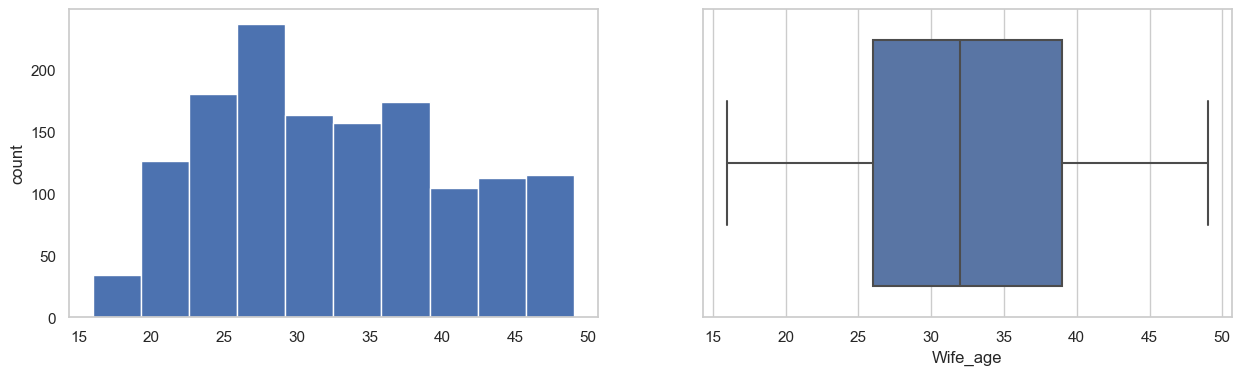

Description of No_of_children_born
----------------------------------------------------------------------------
count    1452.000000
mean        3.254132
std         2.365212
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        16.000000
Name: No_of_children_born, dtype: float64 

Skew : 1.11


Distribution of No_of_children_born
----------------------------------------------------------------------------


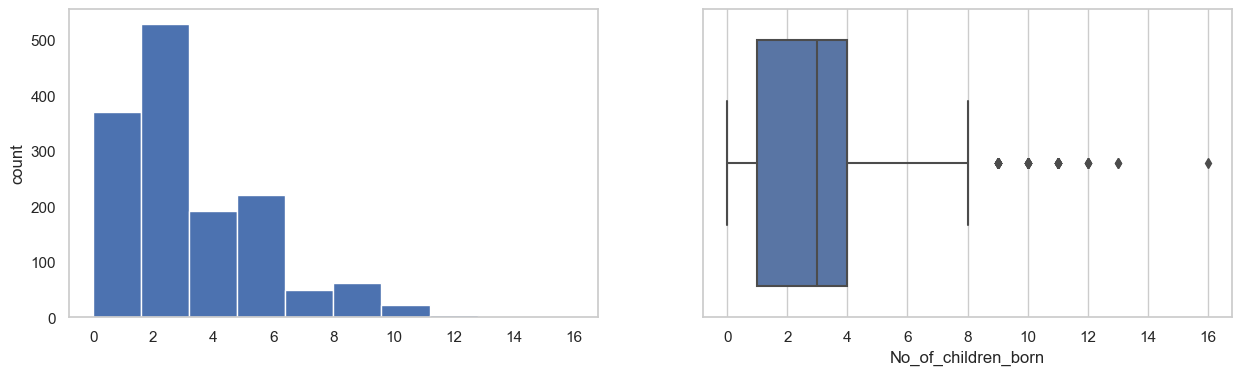

In [678]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [679]:
df_cat = data.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
lstcatcolumns

['Wife_ education',
 'Husband_education',
 'Wife_religion',
 'Wife_Working',
 'Husband_Occupation',
 'Standard_of_living_index',
 'Media_exposure ',
 'Contraceptive_method_used']

In [680]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df_cat[cat_column].value_counts())
    plt.figure(figsize=(8,4))
    ax=df_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    #ax=sns.countplot(data=Auto_Motor_Company,x='Marital_status')
    ax.bar_label(ax.containers[0]);
    plt.show()
    print("       ")

Details of Wife_ education
----------------------------------------------------------------
Tertiary      577
Secondary     410
Primary       334
Uneducated    152
Name: Wife_ education, dtype: int64


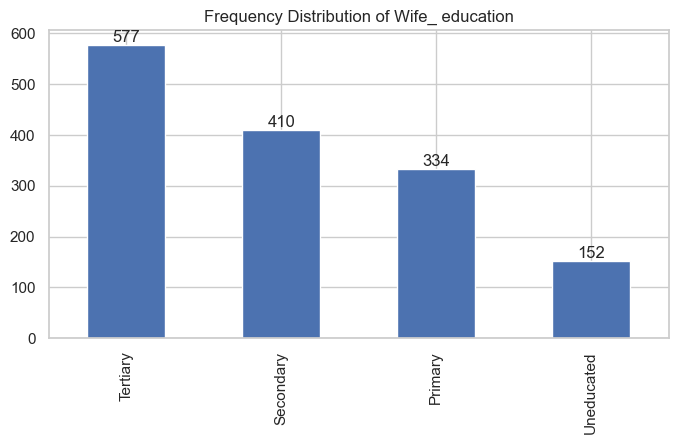

       
Details of Husband_education
----------------------------------------------------------------
Tertiary      899
Secondary     352
Primary       178
Uneducated     44
Name: Husband_education, dtype: int64


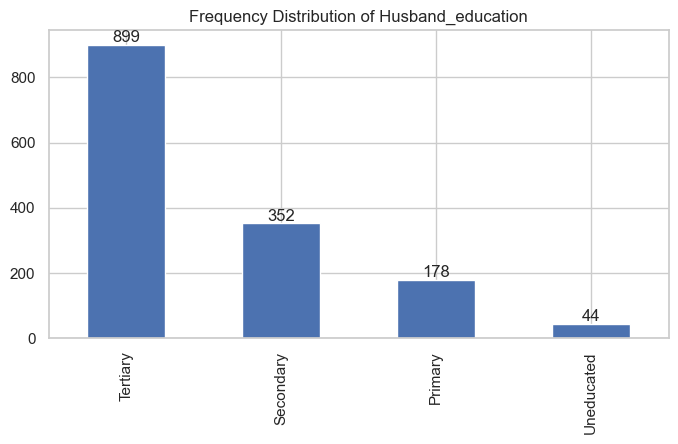

       
Details of Wife_religion
----------------------------------------------------------------
Scientology        1253
Non-Scientology     220
Name: Wife_religion, dtype: int64


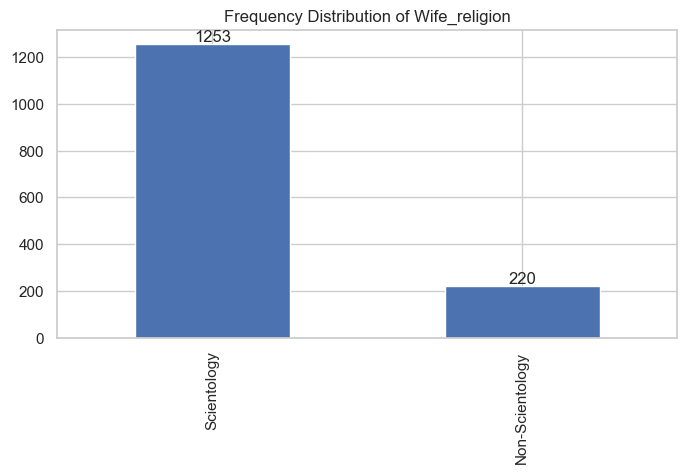

       
Details of Wife_Working
----------------------------------------------------------------
No     1104
Yes     369
Name: Wife_Working, dtype: int64


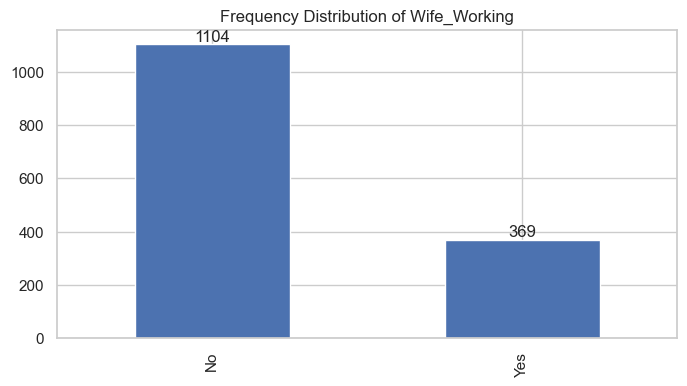

       
Details of Husband_Occupation
----------------------------------------------------------------
3    585
1    436
2    425
4     27
Name: Husband_Occupation, dtype: int64


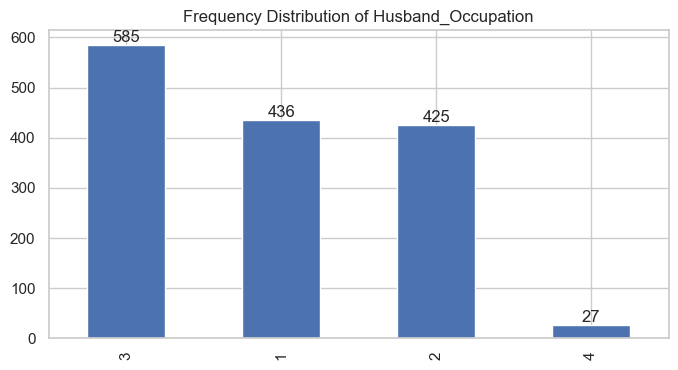

       
Details of Standard_of_living_index
----------------------------------------------------------------
Very High    684
High         431
Low          229
Very Low     129
Name: Standard_of_living_index, dtype: int64


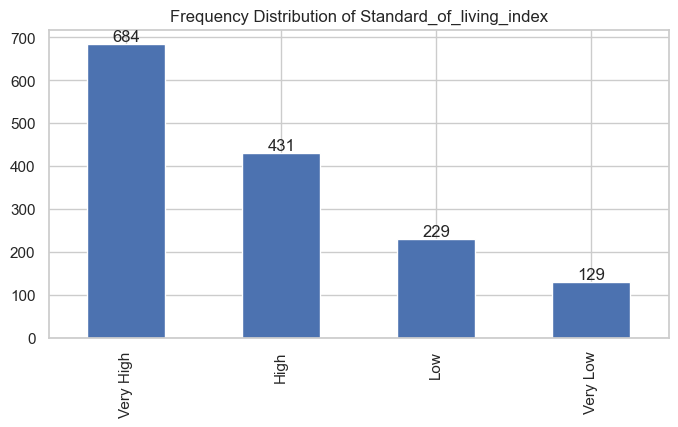

       
Details of Media_exposure 
----------------------------------------------------------------
Exposed        1364
Not-Exposed     109
Name: Media_exposure , dtype: int64


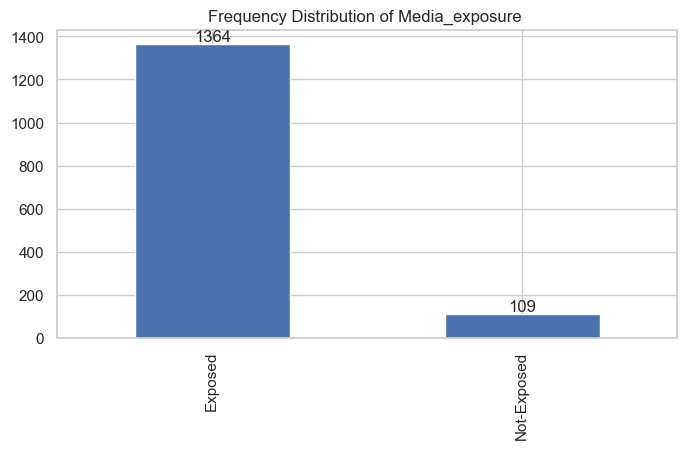

       
Details of Contraceptive_method_used
----------------------------------------------------------------
Yes    844
No     629
Name: Contraceptive_method_used, dtype: int64


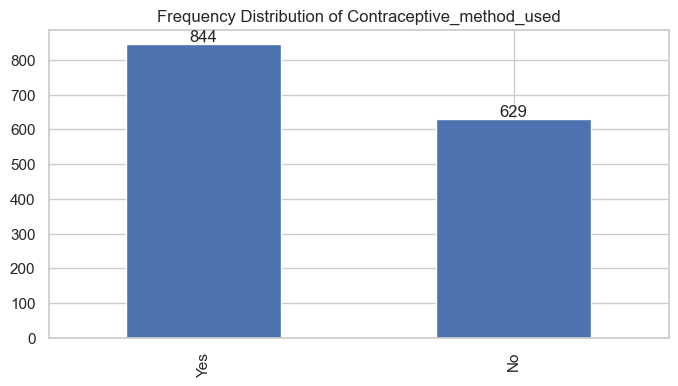

In [681]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

Bivariate analysis

C:\Users\prapthi.pandian\AppData\Local\Temp\ipykernel_9260\4011804005.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")


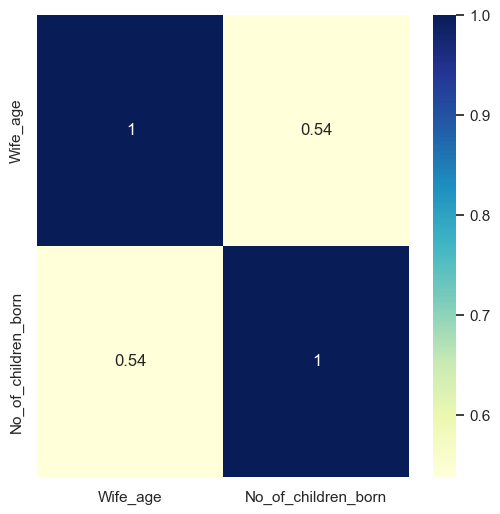

In [682]:
plt.figure(figsize  = (6,6))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show();

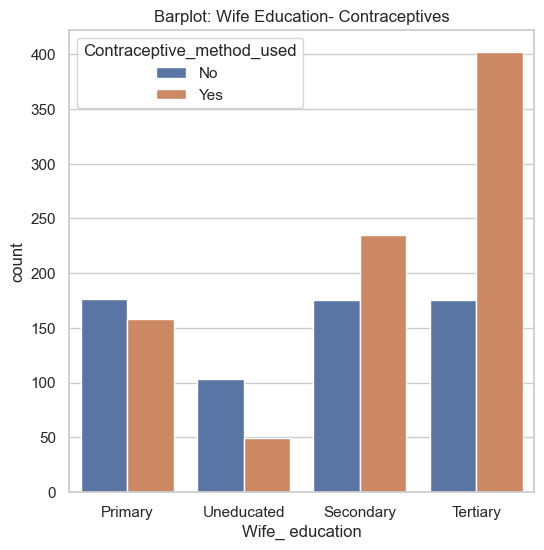

In [683]:
plt.figure(figsize=(6,6))
plt.title('Barplot: Wife Education- Contraceptives')
sns.countplot(data, x='Wife_ education', hue='Contraceptive_method_used');

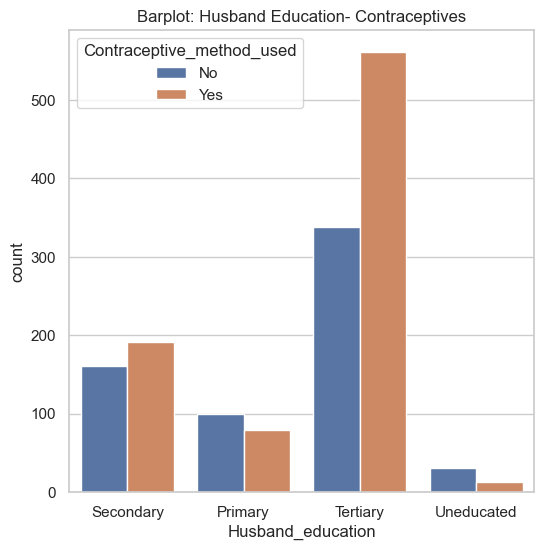

In [684]:
plt.figure(figsize=(6,6))
plt.title('Barplot: Husband Education- Contraceptives')
sns.countplot(data, x='Husband_education', hue='Contraceptive_method_used');

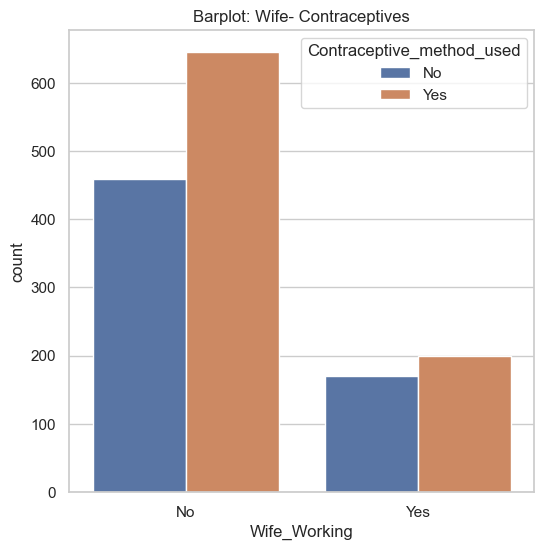

In [685]:
plt.figure(figsize=(6,6))
plt.title('Barplot: Wife- Contraceptives')
sns.countplot(data, x='Wife_Working', hue='Contraceptive_method_used');

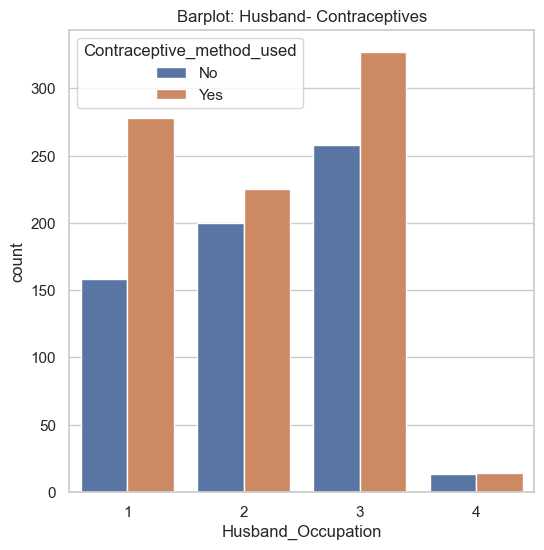

In [686]:
plt.figure(figsize=(6,6))
plt.title('Barplot: Husband- Contraceptives')
sns.countplot(data, x='Husband_Occupation', hue='Contraceptive_method_used');

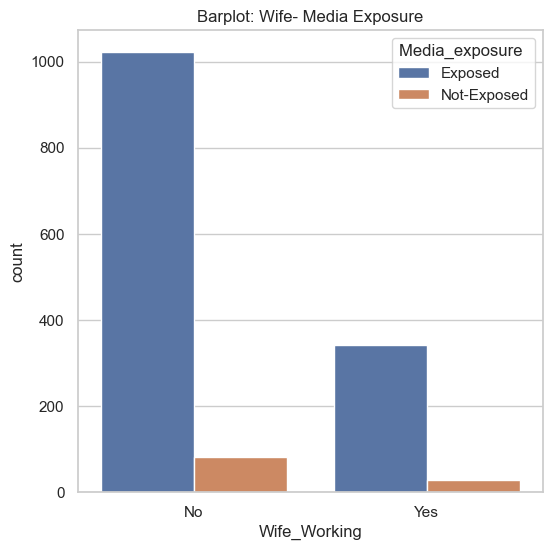

In [687]:
plt.figure(figsize=(6,6))
plt.title('Barplot: Wife- Media Exposure')
sns.countplot(data, x='Wife_Working', hue='Media_exposure ');

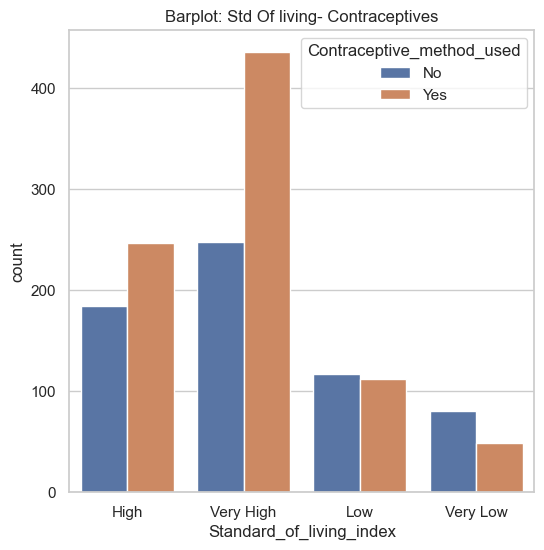

In [688]:
plt.figure(figsize=(6,6))
plt.title('Barplot: Std Of living- Contraceptives')
sns.countplot(data, x='Standard_of_living_index', hue='Contraceptive_method_used');

Multivariate analysis

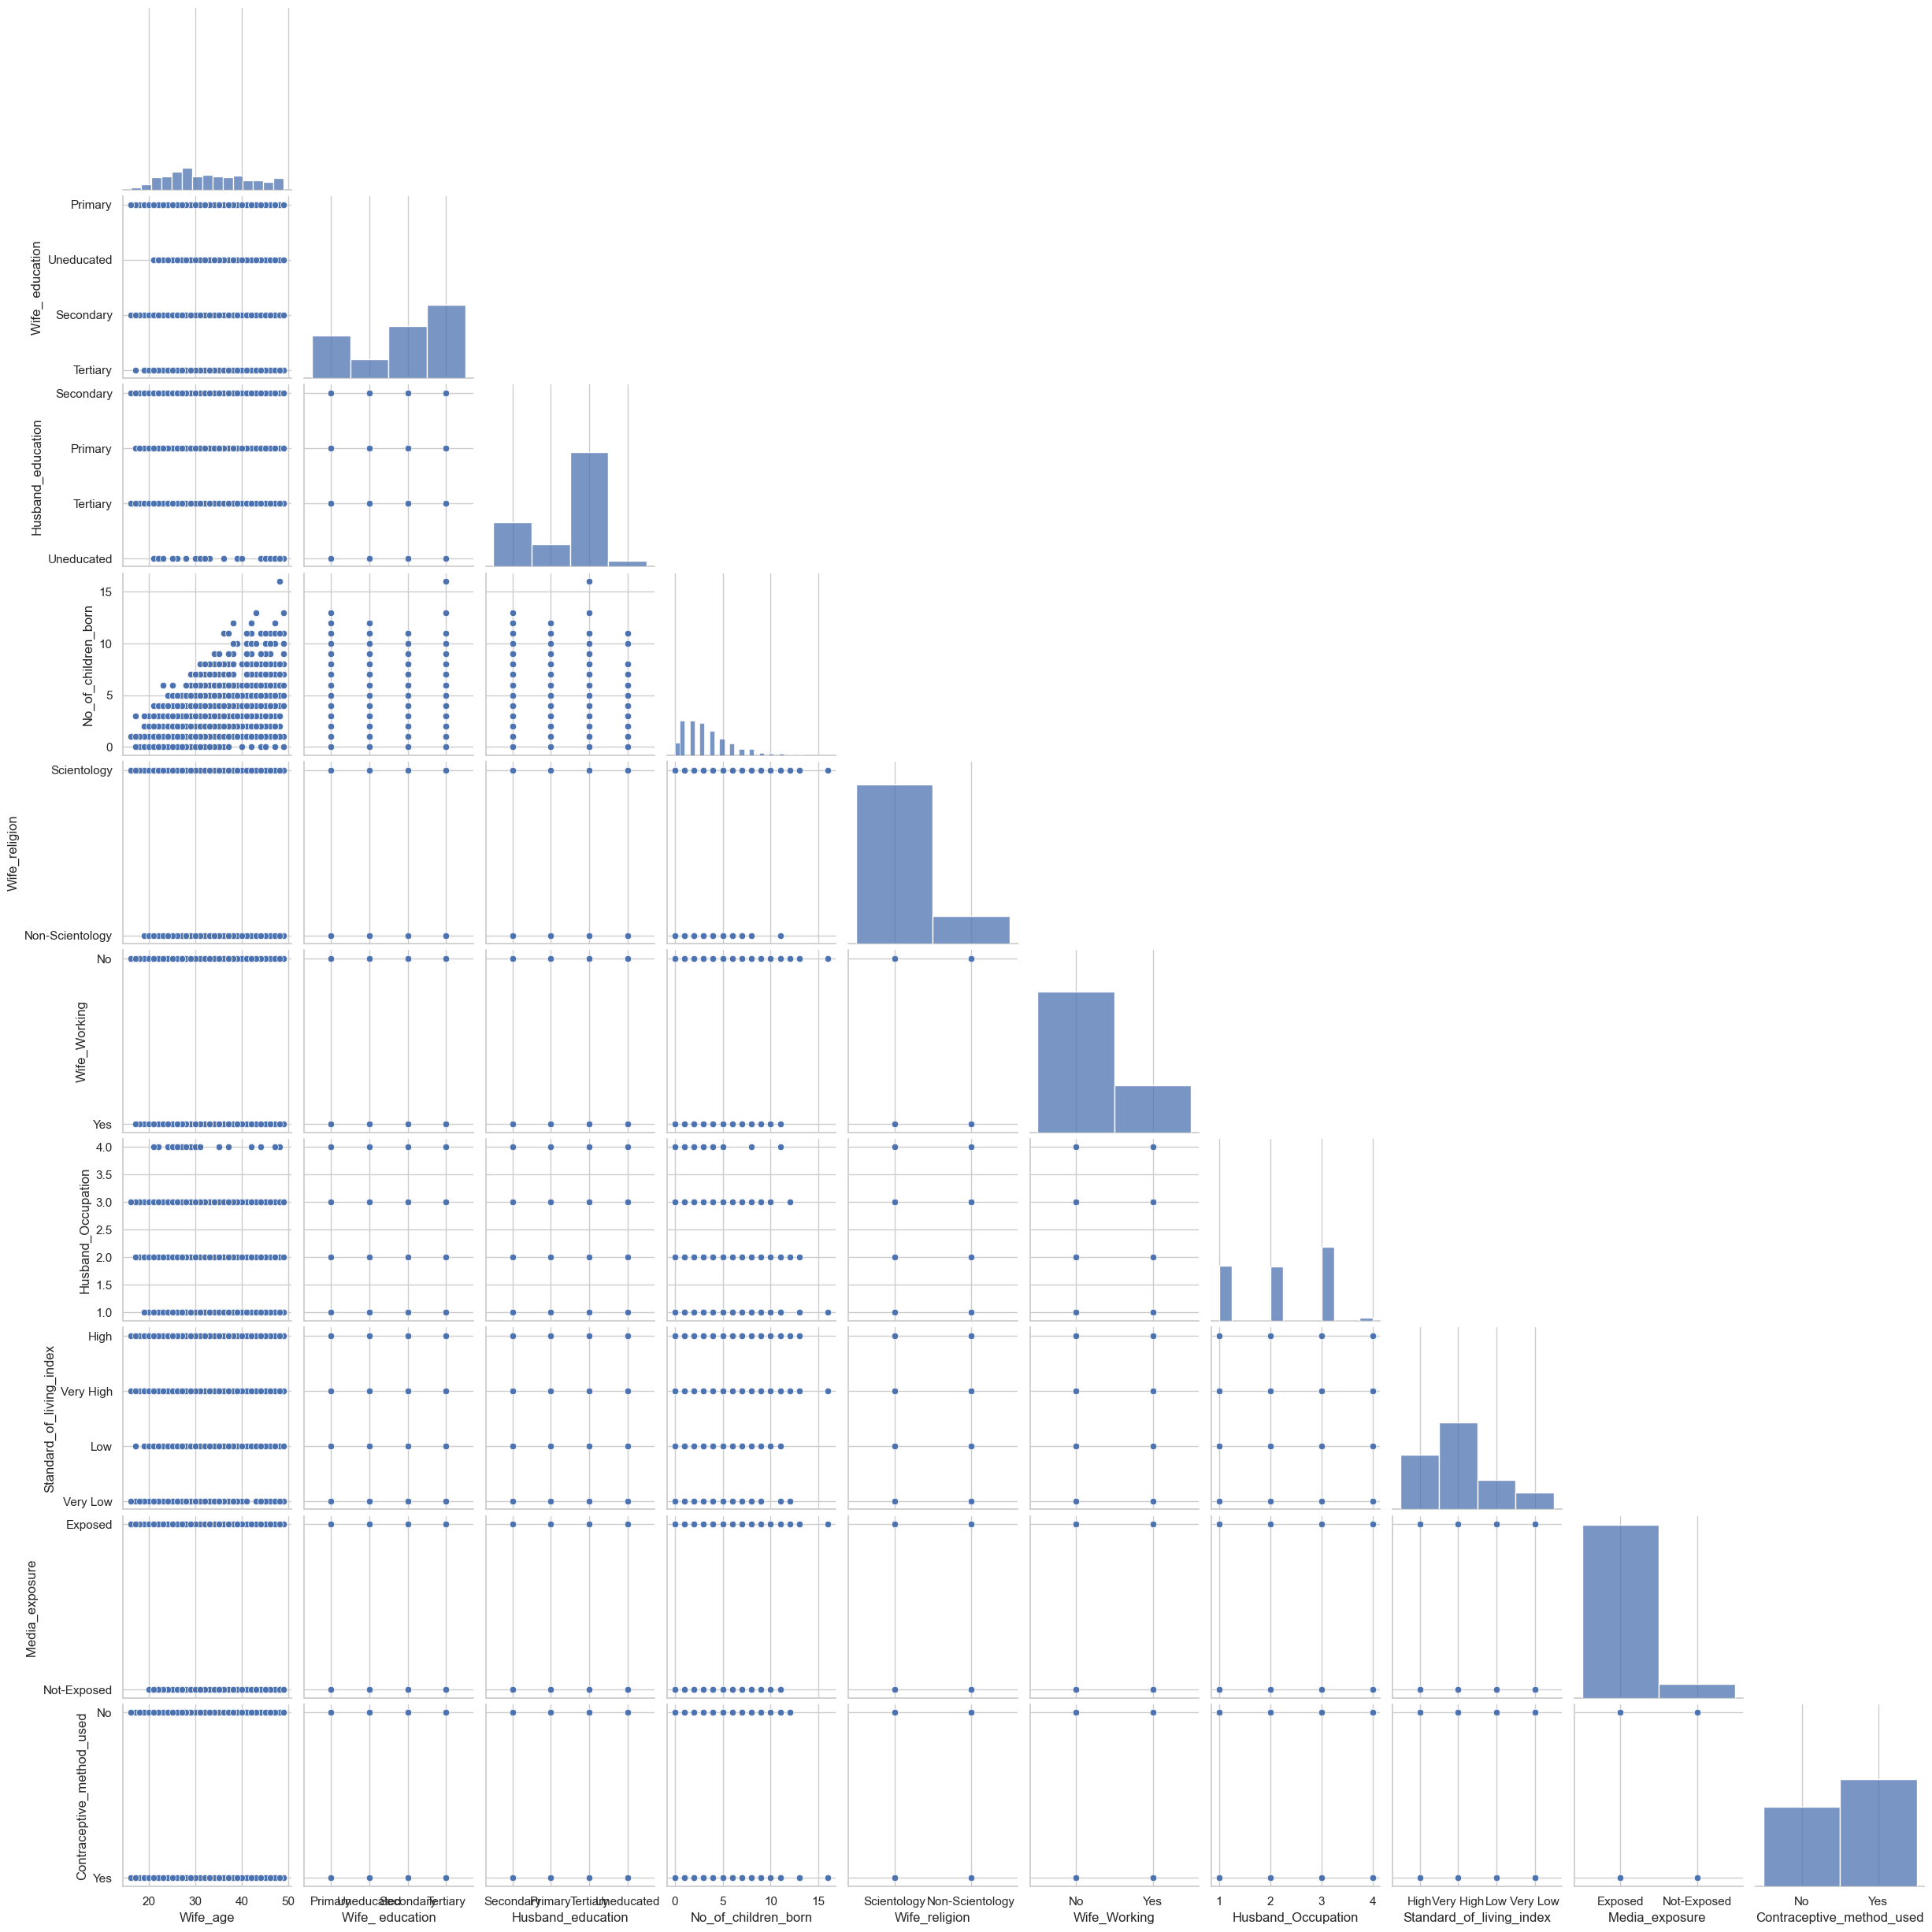

In [689]:
sns.pairplot(data, vars=['Wife_age', 'Wife_ education', 'Husband_education', 'No_of_children_born', 'Wife_religion', 'Wife_Working', 'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ', 'Contraceptive_method_used'], corner= True);

In [690]:
data.duplicated().sum()

80

In [691]:
data.drop_duplicates(inplace=True)

In [692]:
data.duplicated().sum()

0

In [693]:
for column in data.columns:
    if data[column].dtype == 'object':
        print(column.upper(),': ',data[column].nunique())
        print(data[column].value_counts().sort_values())
        print('\n')

WIFE_ EDUCATION :  4
Uneducated    150
Primary       330
Secondary     398
Tertiary      515
Name: Wife_ education, dtype: int64


HUSBAND_EDUCATION :  4
Uneducated     44
Primary       175
Secondary     347
Tertiary      827
Name: Husband_education, dtype: int64


WIFE_RELIGION :  2
Non-Scientology     207
Scientology        1186
Name: Wife_religion, dtype: int64


WIFE_WORKING :  2
Yes     350
No     1043
Name: Wife_Working, dtype: int64


HUSBAND_OCCUPATION :  4
4     27
1    381
2    415
3    570
Name: Husband_Occupation, dtype: int64


STANDARD_OF_LIVING_INDEX :  4
Very Low     129
Low          227
High         419
Very High    618
Name: Standard_of_living_index, dtype: int64


MEDIA_EXPOSURE  :  2
Not-Exposed     109
Exposed        1284
Name: Media_exposure , dtype: int64


CONTRACEPTIVE_METHOD_USED :  2
No     614
Yes    779
Name: Contraceptive_method_used, dtype: int64




In [694]:
data.isnull().sum()

Wife_age                     67
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [695]:
for column in data.columns:
    if data[column].dtype != 'object':
        mean = data[column].median()
        data[column] = data[column].fillna(mean)    
        
data.isnull().sum()        

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

### Outliers treatment

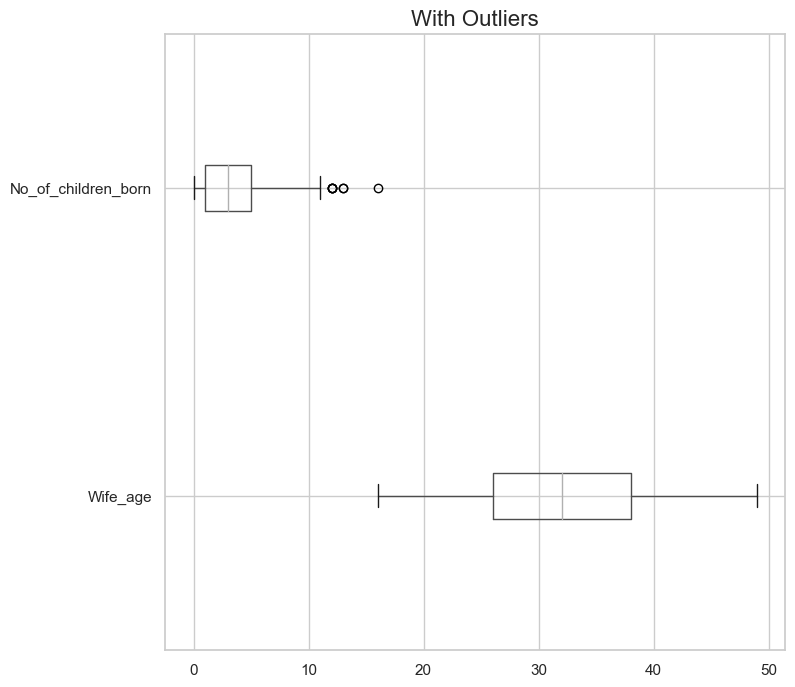

In [696]:
# construct box plot for continuous variables
cont=data.dtypes[(data.dtypes!='uint8') & (data.dtypes!='bool')].index
plt.figure(figsize=(8,8))
data[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

# Convert Object Feature types for Linear Discriminant Analysis

In [697]:
data['Wife_ education']=np.where(data['Wife_ education'] =='Uneducated', 1, data['Wife_ education'])
data['Wife_ education']=np.where(data['Wife_ education'] =='Primary', 2, data['Wife_ education'])
data['Wife_ education']=np.where(data['Wife_ education'] =='Secondary', 3, data['Wife_ education'])
data['Wife_ education']=np.where(data['Wife_ education'] =='Tertiary', 4, data['Wife_ education'])

In [698]:
data['Husband_education']=np.where(data['Husband_education'] =='Uneducated', 1, data['Husband_education'])
data['Husband_education']=np.where(data['Husband_education'] =='Primary', 2, data['Husband_education'])
data['Husband_education']=np.where(data['Husband_education'] =='Secondary', 3, data['Husband_education'])
data['Husband_education']=np.where(data['Husband_education'] =='Tertiary', 4, data['Husband_education'])

In [699]:
data['Wife_religion']=np.where(data['Wife_religion'] =='Scientology', 1, data['Wife_religion'])
data['Wife_religion']=np.where(data['Wife_religion'] =='Non-Scientology', 0, data['Wife_religion'])    

In [700]:
data['Wife_Working']=np.where(data['Wife_Working'] =='Yes', 1, data['Wife_Working'])
data['Wife_Working']=np.where(data['Wife_Working'] =='No', 0, data['Wife_Working'])    

In [701]:
data['Standard_of_living_index']=np.where(data['Standard_of_living_index'] =='Very Low', 1, data['Standard_of_living_index'])
data['Standard_of_living_index']=np.where(data['Standard_of_living_index'] =='Low', 2, data['Standard_of_living_index'])
data['Standard_of_living_index']=np.where(data['Standard_of_living_index'] =='High', 3, data['Standard_of_living_index'])
data['Standard_of_living_index']=np.where(data['Standard_of_living_index'] =='Very High', 4, data['Standard_of_living_index'])

In [702]:
data['Media_exposure ']=np.where(data['Media_exposure '] =='Exposed', 1, data['Media_exposure '])
data['Media_exposure ']=np.where(data['Media_exposure '] =='Not-Exposed', 0, data['Media_exposure '])
    

In [703]:
data['Contraceptive_method_used']=np.where(data['Contraceptive_method_used'] =='Yes', 0, data['Contraceptive_method_used'])
data['Contraceptive_method_used']=np.where(data['Contraceptive_method_used'] =='No', 1, data['Contraceptive_method_used'])
    

In [704]:
data.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0               2                 3                  3.0   
1      45.0               1                 3                 10.0   
2      43.0               2                 3                  7.0   
3      42.0               3                 2                  9.0   
4      36.0               3                 3                  8.0   

  Wife_religion Wife_Working Husband_Occupation Standard_of_living_index  \
0             1            0                  2                        3   
1             1            0                  3                        4   
2             1            0                  3                        4   
3             1            0                  3                        3   
4             1            0                  3                        2   

  Media_exposure  Contraceptive_method_used  
0               1                         1  
1               1                         1  
2               1                         1  
3               1                         1  
4               1                         1

In [705]:
## Converting variable to numeric

data['Wife_ education'] = data['Wife_ education'].astype('int64')
data['Husband_education'] = data['Husband_education'].astype('int64')
data['Wife_religion'] = data['Wife_religion'].astype('int64')
data['Wife_Working'] = data['Wife_Working'].astype('int64')
data['Husband_Occupation']=data['Husband_Occupation'].astype('int64')
data['Standard_of_living_index'] = data['Standard_of_living_index'].astype('int64')
data['Media_exposure '] = data['Media_exposure '].astype('int64')
data['Contraceptive_method_used'] = data['Contraceptive_method_used'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   Wife_ education            1393 non-null   int64  
 2   Husband_education          1393 non-null   int64  
 3   No_of_children_born        1393 non-null   float64
 4   Wife_religion              1393 non-null   int64  
 5   Wife_Working               1393 non-null   int64  
 6   Husband_Occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   int64  
 8   Media_exposure             1393 non-null   int64  
 9   Contraceptive_method_used  1393 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 119.7 KB


In [706]:
data['Contraceptive_method_used'].value_counts()

0    779
1    614
Name: Contraceptive_method_used, dtype: int64

In [707]:
data.corr()

Wife_age  Wife_ education  Husband_education  \
Wife_age                   1.000000        -0.057025          -0.062177   
Wife_ education           -0.057025         1.000000           0.606868   
Husband_education         -0.062177         0.606868           1.000000   
No_of_children_born        0.528428        -0.193076          -0.186437   
Wife_religion             -0.134091        -0.236765          -0.181347   
Wife_Working               0.032000         0.058523          -0.005429   
Husband_Occupation        -0.187070        -0.370799          -0.317932   
Standard_of_living_index   0.171420         0.341412           0.342141   
Media_exposure            -0.119737         0.334415           0.285320   
Contraceptive_method_used  0.098228        -0.228341          -0.144646   

                           No_of_children_born  Wife_religion  Wife_Working  \
Wife_age                              0.528428      -0.134091      0.032000   
Wife_ education                      -0.193076      -0.236765      0.058523   
Husband_education                    -0.186437      -0.181347     -0.005429   
No_of_children_born                   1.000000       0.081623     -0.103751   
Wife_religion                         0.081623       1.000000     -0.055791   
Wife_Working                         -0.103751      -0.055791      1.000000   
Husband_Occupation                   -0.024213       0.090034     -0.013669   
Standard_of_living_index             -0.002481      -0.201524      0.078367   
Media_exposure                       -0.132228      -0.061603      0.002385   
Contraceptive_method_used            -0.118343       0.070084      0.042433   

                           Husband_Occupation  Standard_of_living_index  \
Wife_age                            -0.187070                  0.171420   
Wife_ education                     -0.370799                  0.341412   
Husband_education                   -0.317932                  0.342141   
No_of_children_born                 -0.024213                 -0.002481   
Wife_religion                        0.090034                 -0.201524   
Wife_Working                        -0.013669                  0.078367   
Husband_Occupation                   1.000000                 -0.270934   
Standard_of_living_index            -0.270934                  1.000000   
Media_exposure                      -0.106340                  0.245634   
Contraceptive_method_used            0.040438                 -0.146416   

                           Media_exposure   Contraceptive_method_used  
Wife_age                         -0.119737                   0.098228  
Wife_ education                   0.334415                  -0.228341  
Husband_education                 0.285320                  -0.144646  
No_of_children_born              -0.132228                  -0.118343  
Wife_religion                    -0.061603                   0.070084  
Wife_Working                      0.002385                   0.042433  
Husband_Occupation               -0.106340                   0.040438  
Standard_of_living_index          0.245634                  -0.146416  
Media_exposure                    1.000000                  -0.139744  
Contraceptive_method_used        -0.139744                   1.000000

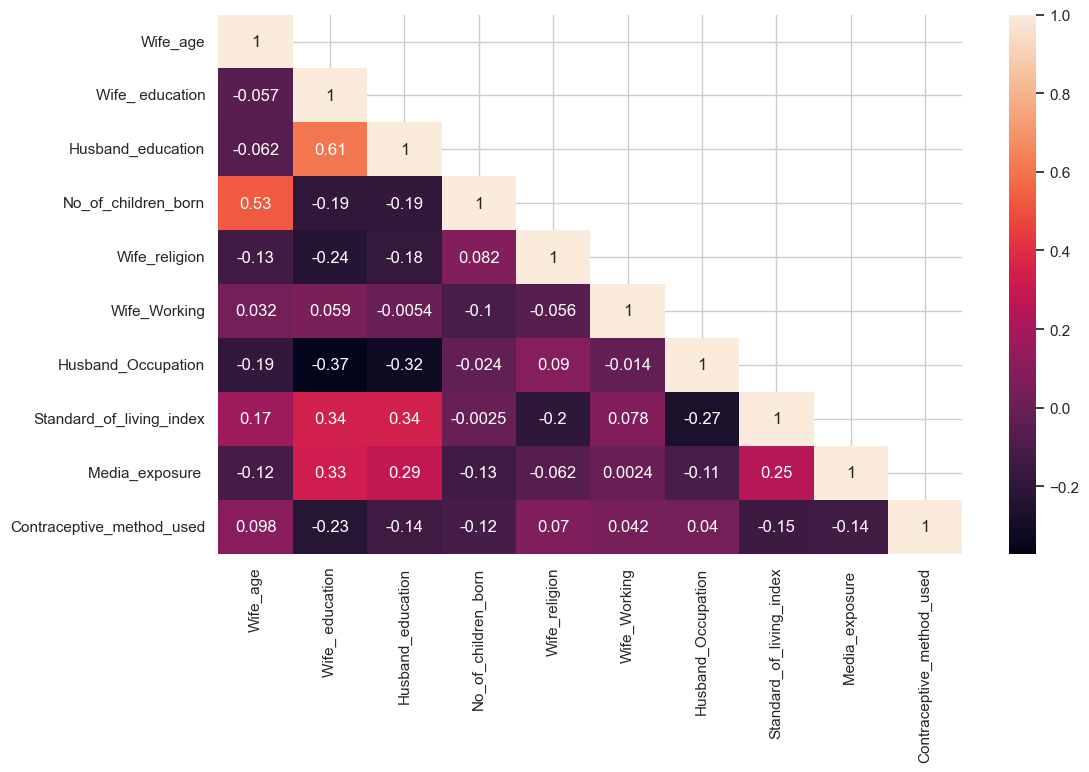

In [708]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(), annot=True,mask=np.triu(data.corr(),+1));

### Train (70%) - Test (30%) Split

In [709]:
# Creating a copy of the original data frame
df = data.copy()

In [710]:
df.head()

Wife_age  Wife_ education  Husband_education  No_of_children_born  \
0      24.0                2                  3                  3.0   
1      45.0                1                  3                 10.0   
2      43.0                2                  3                  7.0   
3      42.0                3                  2                  9.0   
4      36.0                3                  3                  8.0   

   Wife_religion  Wife_Working  Husband_Occupation  Standard_of_living_index  \
0              1             0                   2                         3   
1              1             0                   3                         4   
2              1             0                   3                         4   
3              1             0                   3                         3   
4              1             0                   3                         2   

   Media_exposure   Contraceptive_method_used  
0                1                          1  
1                1                          1  
2                1                          1  
3                1                          1  
4                1                          1

In [711]:
# Copy all the predictor variables into X dataframe
X = df.drop('Contraceptive_method_used', axis=1)

# Copy target into the y dataframe. 
y = df['Contraceptive_method_used']

In [712]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,y,test_size=0.30,random_state=1,stratify = y)


In [713]:
Y_train.value_counts(1)

0    0.558974
1    0.441026
Name: Contraceptive_method_used, dtype: float64

In [714]:
Y_test.value_counts(1)

0    0.559809
1    0.440191
Name: Contraceptive_method_used, dtype: float64

In [715]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',Y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',Y_test.shape)

Number of rows and columns of the training set for the independent variables: (975, 9)
Number of rows and columns of the training set for the dependent variable: (975,)
Number of rows and columns of the test set for the independent variables: (418, 9)
Number of rows and columns of the test set for the dependent variable: (418,)


### Logistic Regression Model

In [716]:
from sklearn.linear_model import LogisticRegression

In [717]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, Y_train)

C:\Users\prapthi.pandian\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    5.3s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

### Predicting on Training and Test dataset

In [718]:
ytrain_predict = model.predict(X_train)
ytrain_predict

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [719]:
ytest_predict = model.predict(X_test)
ytest_predict 

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,

### Getting the Predicted Classes and Probs

In [720]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob)

0         1
0    0.819851  0.180149
1    0.634207  0.365793
2    0.659119  0.340881
3    0.476370  0.523630
4    0.263909  0.736091
..        ...       ...
413  0.114172  0.885828
414  0.721743  0.278257
415  0.756333  0.243667
416  0.431756  0.568244
417  0.542762  0.457238

[418 rows x 2 columns]

In [721]:
ytrain_predict_prob=model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob)

0         1
0    0.491259  0.508741
1    0.794138  0.205862
2    0.813545  0.186455
3    0.835770  0.164230
4    0.412272  0.587728
..        ...       ...
970  0.810950  0.189050
971  0.493644  0.506356
972  0.144435  0.855565
973  0.220199  0.779801
974  0.791254  0.208746

[975 rows x 2 columns]

## Model Evaluation

In [722]:
# Accuracy - Training Data
model.score(X_train, Y_train)

0.676923076923077

### AUC and ROC for the training data

AUC: 0.703


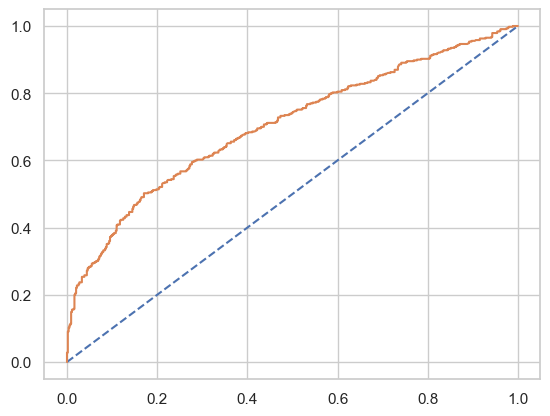

In [723]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [724]:
# Accuracy - Test Data
model.score(X_test, Y_test)

0.6148325358851675

### AUC and ROC for the test data

AUC: 0.703


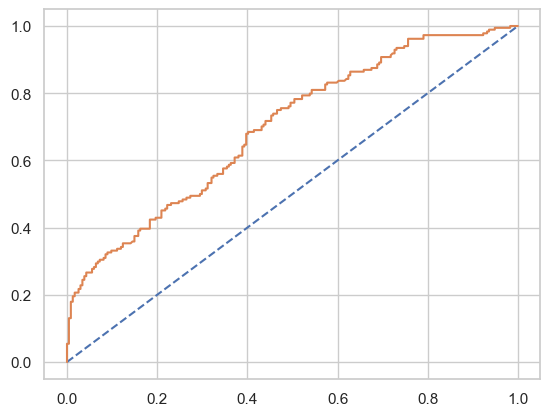

In [725]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Confusion Matrix for the training data

In [726]:
cm= confusion_matrix(Y_train, ytrain_predict)
cm

array([[442, 103],
       [212, 218]], dtype=int64)

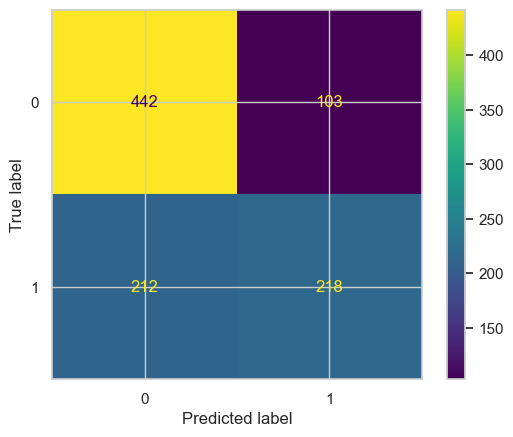

In [727]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot();

In [728]:
print(classification_report(Y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.68      0.81      0.74       545
           1       0.68      0.51      0.58       430

    accuracy                           0.68       975
   macro avg       0.68      0.66      0.66       975
weighted avg       0.68      0.68      0.67       975



### Confusion Matrix for test data

In [729]:
cm1=confusion_matrix(Y_test, ytest_predict)
cm1

array([[166,  68],
       [ 93,  91]], dtype=int64)

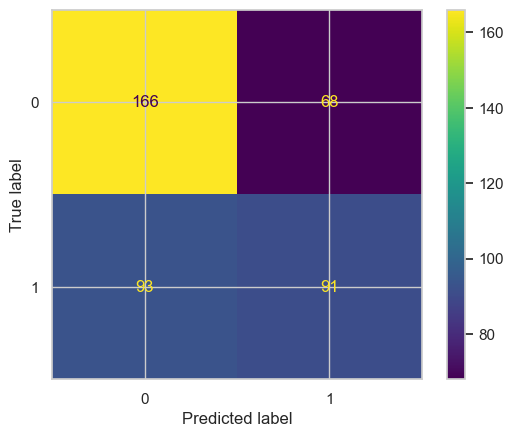

In [730]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=model.classes_)
disp.plot();

In [731]:
print(classification_report(Y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.64      0.71      0.67       234
           1       0.57      0.49      0.53       184

    accuracy                           0.61       418
   macro avg       0.61      0.60      0.60       418
weighted avg       0.61      0.61      0.61       418



## Applying GridSearchCV for Logistic Regression

In [732]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [733]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [734]:
from sklearn.model_selection import GridSearchCV

In [735]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [736]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [737]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag')


In [738]:
best_model = grid_search.best_estimator_

In [739]:
# Prediction on the training and test set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [740]:
## Getting the probabilities on the train set

ytrain_predict_prob=best_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

0         1
0  0.491258  0.508742
1  0.793562  0.206438
2  0.813929  0.186071
3  0.833822  0.166178
4  0.421643  0.578357

In [741]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.817921  0.182079
1  0.634508  0.365492
2  0.657642  0.342358
3  0.475473  0.524527
4  0.272241  0.727759

In [742]:
## Confusion matrix on the training data
cm = confusion_matrix(Y_train, ytrain_predict)
cm

array([[440, 105],
       [211, 219]], dtype=int64)

              precision    recall  f1-score   support

           0       0.68      0.81      0.74       545
           1       0.68      0.51      0.58       430

    accuracy                           0.68       975
   macro avg       0.68      0.66      0.66       975
weighted avg       0.68      0.68      0.67       975
 



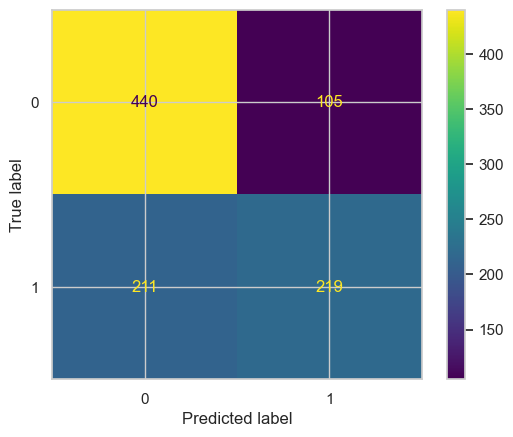

In [743]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
print(classification_report(Y_train, ytrain_predict),'\n');

In [744]:
## Confusion matrix on the test data
cm = confusion_matrix(Y_test, ytest_predict)
cm

array([[165,  69],
       [ 92,  92]], dtype=int64)

              precision    recall  f1-score   support

           0       0.64      0.71      0.67       234
           1       0.57      0.50      0.53       184

    accuracy                           0.61       418
   macro avg       0.61      0.60      0.60       418
weighted avg       0.61      0.61      0.61       418
 



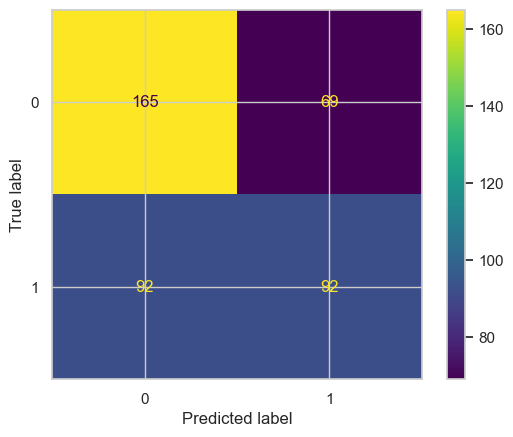

In [745]:

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
print(classification_report(Y_test, ytest_predict),'\n');

In [746]:
# Accuracy - Training Data
best_model.score(X_train, Y_train)

0.6758974358974359

AUC: 0.703


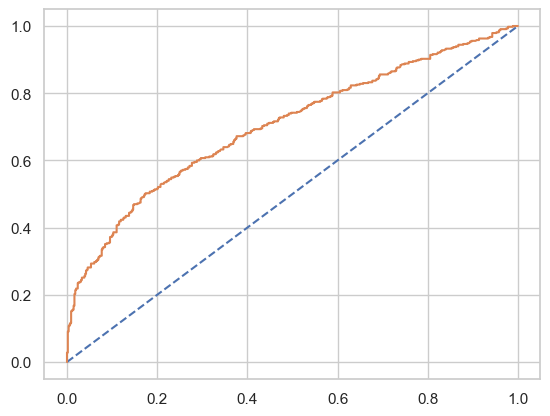

In [747]:
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [748]:
# Accuracy - Test Data
best_model.score(X_test, Y_test)

0.6148325358851675

AUC: 0.703


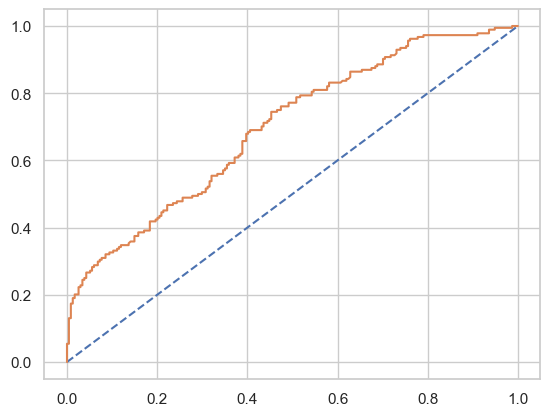

In [749]:
# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### LDA Model

In [750]:
#Build LDA Model
# Refer details for LDA at http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
clf = LinearDiscriminantAnalysis()
model=clf.fit(X,y)
model

LinearDiscriminantAnalysis()

### Prediction

In [751]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

In [752]:
pred_class_train

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [753]:
pred_class_test

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,

### Training Data and Test Data Confusion Matrix Comparison

In [754]:
## Confusion matrix on the training data
cm = confusion_matrix(Y_train, pred_class_train)
cm

array([[457,  88],
       [221, 209]], dtype=int64)

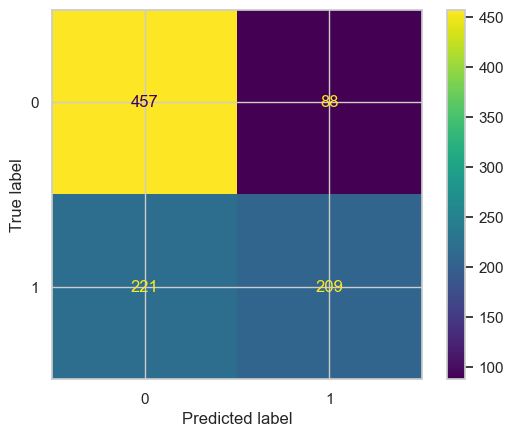

In [755]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot();

In [756]:
## Confusion matrix on the test data
cm = confusion_matrix(Y_test, pred_class_test)
cm

array([[173,  61],
       [ 95,  89]], dtype=int64)

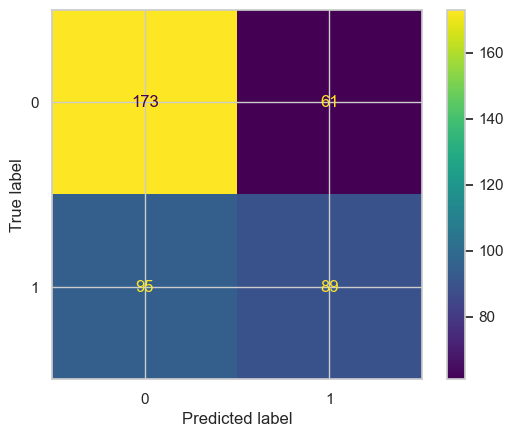

In [757]:

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot();

### Training Data and Test Data Classification Report Comparison

In [758]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.84      0.75       545
           1       0.70      0.49      0.57       430

    accuracy                           0.68       975
   macro avg       0.69      0.66      0.66       975
weighted avg       0.69      0.68      0.67       975
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.65      0.74      0.69       234
           1       0.59      0.48      0.53       184

    accuracy                           0.63       418
   macro avg       0.62      0.61      0.61       418
weighted avg       0.62      0.63      0.62       418
 



### Probability prediction for the training and test data

In [759]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.703
AUC for the Test Data: 0.705


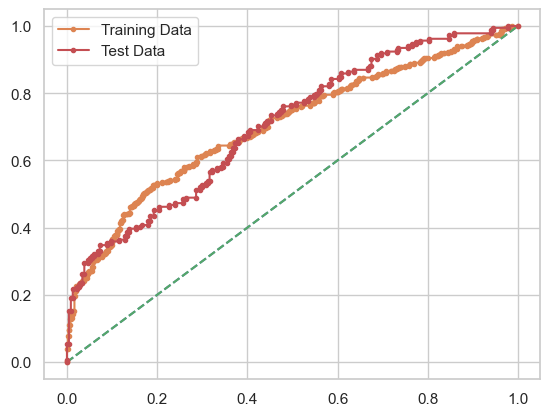

In [760]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [761]:
pred_prob_train[:20]

array([[0.50831811, 0.49168189],
       [0.81160197, 0.18839803],
       [0.79329158, 0.20670842],
       [0.84796879, 0.15203121],
       [0.40985458, 0.59014542],
       [0.59835143, 0.40164857],
       [0.74714196, 0.25285804],
       [0.46492291, 0.53507709],
       [0.48757061, 0.51242939],
       [0.87340548, 0.12659452],
       [0.34457659, 0.65542341],
       [0.55260921, 0.44739079],
       [0.52557647, 0.47442353],
       [0.64245896, 0.35754104],
       [0.66027055, 0.33972945],
       [0.41212167, 0.58787833],
       [0.41458502, 0.58541498],
       [0.76658553, 0.23341447],
       [0.33400859, 0.66599141],
       [0.77971172, 0.22028828]])

In [762]:
pred_prob_test[:20]

array([[0.81548004, 0.18451996],
       [0.61375202, 0.38624798],
       [0.64486414, 0.35513586],
       [0.49675781, 0.50324219],
       [0.27804999, 0.72195001],
       [0.49945663, 0.50054337],
       [0.54479929, 0.45520071],
       [0.6246769 , 0.3753231 ],
       [0.82097008, 0.17902992],
       [0.24062221, 0.75937779],
       [0.53554255, 0.46445745],
       [0.183702  , 0.816298  ],
       [0.64801241, 0.35198759],
       [0.80477943, 0.19522057],
       [0.73054665, 0.26945335],
       [0.61058935, 0.38941065],
       [0.81355584, 0.18644416],
       [0.79014939, 0.20985061],
       [0.78699925, 0.21300075],
       [0.73020957, 0.26979043]])

### Generate Coefficients and intercept for the Linear Discriminant Function

In [763]:
#intercept value
clf.intercept_ 

array([0.84034378])

In [764]:
#coefficients for the Linear Discriminant Function
clf.coef_

array([[ 0.07511072, -0.50898147, -0.01209484, -0.3032077 ,  0.38161852,
         0.13955146, -0.10950659, -0.24636313, -0.43083527]])

In [765]:
X.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure '],
      dtype='object')

In [766]:
a=clf.coef_
np.round(a,2) # rounded up coefficients 

array([[ 0.08, -0.51, -0.01, -0.3 ,  0.38,  0.14, -0.11, -0.25, -0.43]])

### Decision Tree

In [767]:
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'gini')

In [768]:
# Fit the model
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [769]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()


### Variable Importance

In [770]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))


                               Imp
Wife_age                  0.294870
No_of_children_born       0.253824
Standard_of_living_index  0.096836
Wife_ education           0.089735
Husband_Occupation        0.081690
Husband_education         0.080626
Wife_Working              0.063336
Wife_religion             0.026510
Media_exposure            0.012574


### Predicting on Training and Test dataset

In [771]:
ytrain_predict = dt_model.predict(X_train)
ytest_predict = dt_model.predict(X_test)

In [772]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (975,)
ytest_predict (418,)


### Getting the Predicted Classes

In [773]:
ytest_predict

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,

In [774]:
ytrain_predict

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,

### Getting the Predicted Probabilities

In [775]:
ytest_predict_prob=dt_model.predict_proba(X_test)
ytest_predict_prob[:20]

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [776]:
ytrain_predict_prob=dt_model.predict_proba(X_train)
ytrain_predict[:20]

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1],
      dtype=int64)

# Model Evaluation

## Measuring AUC-ROC Curve

### AUC and ROC for the training data

AUC: 0.999


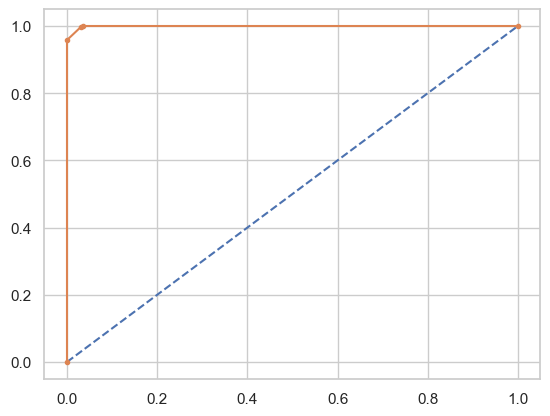

In [777]:
# predict probabilities
probs = dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show();

### AUC and ROC for the test data

AUC: 0.648


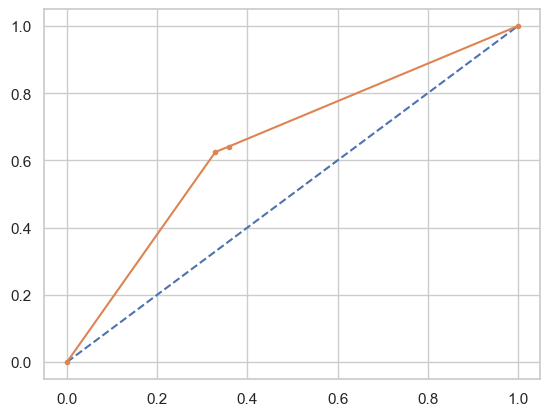

In [778]:
# predict probabilities
probs = dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Confusion Matrix for the training data

In [779]:
confusion_matrix(Y_train, ytrain_predict)

array([[545,   0],
       [ 18, 412]], dtype=int64)

In [780]:
#Train Data Accuracy
dt_model.score(X_train,Y_train) 

0.9815384615384616

In [781]:
print(classification_report(Y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       545
           1       1.00      0.96      0.98       430

    accuracy                           0.98       975
   macro avg       0.98      0.98      0.98       975
weighted avg       0.98      0.98      0.98       975



## Confusion Matrix for the test data

In [782]:
confusion_matrix(Y_test, ytest_predict)

array([[157,  77],
       [ 69, 115]], dtype=int64)

In [783]:
#Test Data Accuracy
dt_model.score(X_test,Y_test)

0.6507177033492823

In [784]:
print(classification_report(Y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68       234
           1       0.60      0.62      0.61       184

    accuracy                           0.65       418
   macro avg       0.65      0.65      0.65       418
weighted avg       0.65      0.65      0.65       418



In [785]:
dtc = DecisionTreeClassifier()
lda= LinearDiscriminantAnalysis()
lor= LogisticRegression()


models=[dtc,lda,lor]

accuracy_train=[]
accuracy_test=[]


for i in models:  # Computation of RMSE and R2 values 
    i.fit(X_train,Y_train)
    accuracy_train.append(accuracy_score(Y_train,i.predict(X_train)))
    accuracy_test.append(accuracy_score(Y_test,i.predict(X_test)))
        
print(pd.DataFrame({'Train Accuracy': accuracy_train,'Test Accuracy': accuracy_test},
            index=['Decision Tree Classifier','LDA','Logistic Regression']))

                          Train Accuracy  Test Accuracy
Decision Tree Classifier        0.981538       0.643541
LDA                             0.682051       0.622010
Logistic Regression             0.676923       0.617225


C:\Users\prapthi.pandian\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [786]:
param_grid = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [15,30,35,40,50],
    'criterion' :['gini', 'entropy']
}

dtr=tree.DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(X_train,Y_train)

print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 30, 'min_samples_split': 35}


In [787]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=30, min_samples_split=35)
#Using best parameters in above 
lda= LinearDiscriminantAnalysis()
lor= LogisticRegression()


models=[dtc,lda,lor]

accuracy_train=[]
accuracy_test=[]


for i in models:  # Computation of RMSE and R2 values 
    i.fit(X_train,Y_train)
    accuracy_train.append(accuracy_score(Y_train,i.predict(X_train)))
    accuracy_test.append(accuracy_score(Y_test,i.predict(X_test)))
        
print(pd.DataFrame({'Train Accuracy': accuracy_train,'Test Accuracy': accuracy_test},
            index=['Decision Tree Classifier','LDA','Logistic Regression']))

                          Train Accuracy  Test Accuracy
Decision Tree Classifier        0.742564       0.698565
LDA                             0.682051       0.622010
Logistic Regression             0.676923       0.617225


C:\Users\prapthi.pandian\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [788]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(dtc, out_file= ld_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

ld_tree_regularized.close()
dot_data

### ROC AUC curve

AUC: 0.803


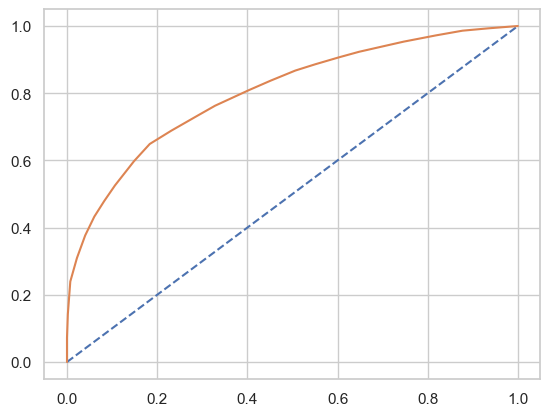

In [789]:
# predict probabilities
probs = dtc.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.803


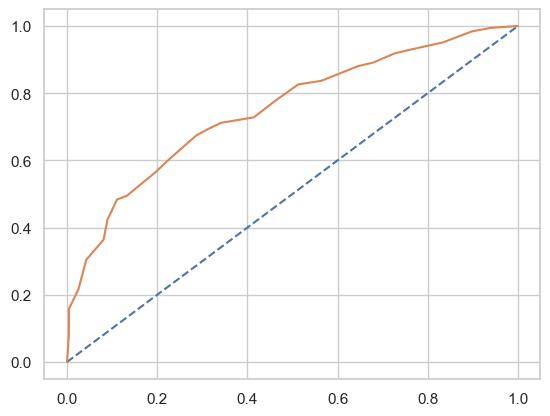

In [790]:
# predict probabilities
probs = dtc.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

###  Classification report 

In [791]:
print(classification_report(Y_train, dtc.predict(X_train)))#Trainig Classification report 

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       545
           1       0.74      0.65      0.69       430

    accuracy                           0.74       975
   macro avg       0.74      0.73      0.73       975
weighted avg       0.74      0.74      0.74       975



In [792]:
print(classification_report(Y_test, dtc.predict(X_test)))#Trainig Classification report 

              precision    recall  f1-score   support

           0       0.71      0.77      0.74       234
           1       0.68      0.60      0.64       184

    accuracy                           0.70       418
   macro avg       0.69      0.69      0.69       418
weighted avg       0.70      0.70      0.70       418



In [793]:
os.getcwd()

'C:\\Users\\prapthi.pandian'